 
# JAMPred

In this notebook, we will use `JAMPred` to calculate the PRS.

`JAMPred` is part of the `R2BGLiMS` package in R.

For more information, visit: [JAMPred Documentation](https://rdrr.io/github/pjnewcombe/R2BGLiMS/man/JAMPred.html)

## R2BGLiMS

`R2BGLiMS` offers Bayesian variable selection under a range of likelihoods, including:
- Linear regression for continuous outcomes
- Logistic regression for binary outcomes
- Weibull regression for survival outcomes
- The "JAM" model for summary genetic association data

**Note:** You must have a Java JDK installed to use `R2BGLiMS`.

To install `R2BGLiMS` using the `devtools` library, run:

```r
library(devtools)
install_github("pjnewcombe/R2BGLiMS")
```

## Configuration

For both binary and continuous phenotypes, different arguments are accepted. Specify the following parameters in the `JAMPred-binary.R` and `JAMPred-continuous.R` files:

```r
iterationsinmillions <- c(0.01)
betaslambda <- c(0.1)
betabinomialprior <- c(1)
effectsduniformpriormin <- c(0.05, 0.01)
effectsduniformpriormax <- c(2, 3)
residualvarinvgammapriormin <- c(0.01)
residualvarinvgammapriormax <- c(0.01)
p.cases.training <- n.cases.training / n.training
```

### Code

```r
jampred.res.lin <- JAMPred(
  marginal.betas = betas,
  n.training = n,
  ref.geno = your_data_frame[, column_names],
  total.snps.genome.wide = num_columns, # Total SNPs across all chromosomes
  n.mil = iter,
  beta.binom.b.lambda = beta,
  beta.binom.a = prior,
  effect.sd.uniform.prior = c(min_effect, max_effect),
  residual.var.invgamma.prior = c(min_var, max_var),
  seed = 1 # For reproducibility. If not set, a random seed is used
)
```

### Binary Phenotype

```r
snps <- chromosome.snps[[1]] # Only use chromosome 1 data
jampred.res.bin <- JAMPred(
  marginal.betas = marginal.logors[snps],
  n.training = n.training,
  marginal.logor.ses = marginal.logor.ses, # Only necessary for a binary trait
  p.cases.training = n.cases.training / n.training, # Only necessary for a binary trait
  ref.geno = data.validation[, snps],
  total.snps.genome.wide = 500000, # Total SNPs across all chromosomes
  n.mil = 0.2,
  seed = 1, # For reproducibility. If not set, a random seed is used
  debug = TRUE
)

out.of.sample.predictions <- 
  data.validation[, jampred.res.bin$snps] %*% 
  jampred.res.bin$step2.posterior.mean.snp.weights

cor(out.of.sample.predictions, data.validation[, "d"])^2 # Should be 0.18
```

#### JAMPred-binary.R

```R
library(R2BGLiMS)
#data("JAMPred_Example")
#help(JAMPred)
#1. Argument one is the directory. Example: `SampleData1`
#2. Argument two is the file name. Example: `SampleData1\\Fold_0`
#3. Argument three is the output file name. Example: `train_data`
#4. Argument four is the specific function to be called. Example: `train_data.QC.clumped.pruned`
#5. Argument five is the GWAS. Example: `EBPRSGWAS.txt`
args <- commandArgs(trailingOnly = TRUE)
#result <-paste(".",args[1],args[4],sep="//")
#data_without_headers <- read.table("SampleData1/Fold_0/train_data.QC.clumped.pruned.JAMPred.JAMPred", header = FALSE, sep = "\t")
data_without_headers <- read.table(args[4], header = FALSE, sep = "\t")
#data_without_headers <- read.table(result, header = FALSE, sep = "\t")

#data_without_headers <- read.csv("SampleData4\Fold_0\train_data.QC.clump.prune.raw", header = FALSE)
#data_without_headers <- read.table("SampleData4/Fold_0/train_data.QC.clump.prune.JAMPred", header = FALSE, sep = "\t")


your_data_frame <- as.data.frame(lapply(data_without_headers, as.numeric))
your_data_frame <- your_data_frame[-1, ]
your_data_frame <- replace(your_data_frame, is.na(your_data_frame), 0)


#your_data_frame <- as.numeric(your_data_frame)
#data_without_headers <- read.table("a1.dose", header = FALSE, sep = "\t")

# Get the number of columns in the data
num_columns <- ncol(your_data_frame)
num_columns <- ncol(data_without_headers)

# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")
#your_data_frame[,"SNP1"]

# Assign headers to the data
colnames(your_data_frame) <- column_names
colnames(data_without_headers) <- column_names


#read GWAS
result <-paste(".",args[2],paste(args[1], toString(".JAMPred"), sep = ""),sep="//")
#result <-paste(".","SampleData1",paste("SampleData1", toString(".JAMPred"), sep = ""),sep="//")
#print(result)
#exit(0)

GWAS <- read.table(result, header=TRUE,sep = "\t")
print(GWAS)
#phenofile <- read.table("SampleData1/Fold_0/train_data.QC.clumped.pruned.fam", header = FALSE, sep = "")
# Replace 0 with 1 in specific column
#phenofile$V6[phenofile$V6 == 1] <- 0

# Replace 2 with 1 in specific column
#phenofile$V6[phenofile$V6 == 2] <- 1

# Count the number of 0 and 1 in the specific column
#controls <- sum(phenofile$V6 == 0)
#cases <- sum(phenofile$V6 == 1)
#gwas_cases <- 20791 
#gwas_controls <-  323124
#gwas_numbers <- gwas_cases+gwas_controls

betas <-GWAS$BETA
#betas<- exp(betas)
Se <-GWAS$SE

num_columns <- length(betas)

# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")

# Assign headers to the data
names(betas) <- column_names
names(Se) <- column_names





num_columns <- length(Se)
#num_columns
# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")
#column_names
#snps <- chromosome.snps[[1]]
#snps
#data.validation[,snps]

your_data_frame[,column_names]
print("xx1")
data.validation <- your_data_frame
print("xx2")
your_data_frame <- as.matrix(your_data_frame)
print("xx3")
 


# Assign headers to the data
names(Se) <- column_names
#your_data_frame[,column_names]
#snps <- data_without_headers
n <-GWAS$N[1]
 


iterationsinmillions <- c( 0.01)
betaslambda <- c(0.1)
betabinomialprior <- c(1)
effectsduniformpriormin <- c(0.05,0.01)
effectsduniformpriormax <- c(2,3)
residualvarinvgammapriormin <- c(0.01)
residualvarinvgammapriormax <- c(0.01)
param_combinations <- expand.grid(
  Iteration = iterationsinmillions,
  Beta_Lambda = betaslambda,
  Beta_Binomial_Prior = betabinomialprior,
  Min_Effect = effectsduniformpriormin,
  Max_Effect = effectsduniformpriormax,
  Min_Var = residualvarinvgammapriormin,
  Max_Var = residualvarinvgammapriormax
)

result <-paste(".",args[2],paste(args[1], toString(".JAMPred_Parameters"), sep = ""),sep="//")
write.table(param_combinations, file = result, row.names = FALSE)


myDataFrame <- data.frame(matrix(runif(num_columns * nrow(param_combinations)), nrow = num_columns, ncol = nrow(param_combinations)))

numColumns <- nrow(param_combinations)
columnNames <- paste("Column", 1:numColumns, sep="_")


for (i in 1:nrow(param_combinations)) {
  row_values <- param_combinations[i, ]
  
  iter <- row_values$Iteration
  beta <- row_values$Beta_Lambda
  prior <- row_values$Beta_Binomial_Prior
  min_effect <- row_values$Min_Effect
  max_effect <- row_values$Max_Effect
  min_var <- row_values$Min_Var
  max_var <- row_values$Max_Var
  
  
  jampred.res.lin <- JAMPred(
    marginal.betas = betas,
    n.training =n,
    ref.geno = your_data_frame[,column_names],
    total.snps.genome.wide = num_columns, # Total SNPs across all chromosomes
    marginal.logor.ses = Se, 
    # Define the number of cases and total number of samples here.
    # We assumed the number of cases to be 1000
    p.cases.training = 1000/30000, # Only necessary for a binary trait
      
    n.mil = iter,
    beta.binom.b.lambda=beta,
    beta.binom.a = prior,
    effect.sd.uniform.prior = c(min_effect,max_effect),
    residual.var.invgamma.prior = c(min_var, max_var),
    seed = 1 # For re-producibility. If not set a random seed is used
  )
  
  # Print values for each iteration
  print(paste(
    "Iteration:", iter,
    "Beta Lambda:", beta,
    "Beta Binomial Prior:", prior,
    "Min Effect:", min_effect,
    "Max Effect:", max_effect,
    "Min Var:", min_var,
    "Max Var:", max_var
  ))
  #myDataFrame[[i]] <- jampred.res.lin$step2.posterior.mean.snp.weights
  myDataFrame[[paste("X", toString(i), sep = "")]] <- jampred.res.lin$step2.posterior.mean.snp.weights

}
result <-paste(".",args[2],paste(args[1], toString(".JAMPred_Effects"), sep = ""),sep="//")

write.csv(myDataFrame, file = result, row.names = FALSE)



```



### Continuous Phenotype

```r
snps <- chromosome.snps[[1]] # Only use chromosome 1 data
jampred.res.lin <- JAMPred(
  marginal.betas = marginal.ctsbetas[snps],
  n.training = n.training,
  ref.geno = data.validation.cts[, snps],
  total.snps.genome.wide = 500000, # Total SNPs across all chromosomes
  n.mil = 0.2,
  seed = 1 # For reproducibility. If not set, a random seed is used
)

out.of.sample.predictions <- 
  0 + # NB: A trait mean could be set here (otherwise it is assumed the outcome is mean-centred)
  data.validation.cts[, jampred.res.lin$snps] %*% 
  jampred.res.lin$step2.posterior.mean.snp.weights

cor(out.of.sample.predictions, data.validation.cts[, "y"])^2 # Should be 0.15
```

#### JAMPred-binary.R

```r
library(R2BGLiMS)
#data("JAMPred_Example")
#help(JAMPred)
#1. Argument one is the directory. Example: `SampleData1`
#2. Argument two is the file name. Example: `SampleData1\\Fold_0`
#3. Argument three is the output file name. Example: `train_data`
#4. Argument four is the specific function to be called. Example: `train_data.QC.clumped.pruned`
#5. Argument five is the GWAS. Example: `EBPRSGWAS.txt`
args <- commandArgs(trailingOnly = TRUE)
#result <-paste(".",args[1],args[4],sep="//")
#data_without_headers <- read.table("SampleData1/Fold_0/train_data.QC.clumped.pruned.JAMPred.JAMPred", header = FALSE, sep = "\t")
data_without_headers <- read.table(args[4], header = FALSE, sep = "\t")
#data_without_headers <- read.table(result, header = FALSE, sep = "\t")

#data_without_headers <- read.csv("SampleData4\Fold_0\train_data.QC.clump.prune.raw", header = FALSE)
#data_without_headers <- read.table("SampleData4/Fold_0/train_data.QC.clump.prune.JAMPred", header = FALSE, sep = "\t")


your_data_frame <- as.data.frame(lapply(data_without_headers, as.numeric))
your_data_frame <- your_data_frame[-1, ]
your_data_frame <- replace(your_data_frame, is.na(your_data_frame), 0)


#your_data_frame <- as.numeric(your_data_frame)
#data_without_headers <- read.table("a1.dose", header = FALSE, sep = "\t")

# Get the number of columns in the data
num_columns <- ncol(your_data_frame)
num_columns <- ncol(data_without_headers)

# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")
#your_data_frame[,"SNP1"]

# Assign headers to the data
colnames(your_data_frame) <- column_names
colnames(data_without_headers) <- column_names


#read GWAS
result <-paste(".",args[2],paste(args[1], toString(".JAMPred"), sep = ""),sep="//")
#result <-paste(".","SampleData1",paste("SampleData1", toString(".JAMPred"), sep = ""),sep="//")
#print(result)
#exit(0)

GWAS <- read.table(result, header=TRUE,sep = "\t")
print(GWAS)
#phenofile <- read.table("SampleData1/Fold_0/train_data.QC.clumped.pruned.fam", header = FALSE, sep = "")
# Replace 0 with 1 in specific column
#phenofile$V6[phenofile$V6 == 1] <- 0

# Replace 2 with 1 in specific column
#phenofile$V6[phenofile$V6 == 2] <- 1

# Count the number of 0 and 1 in the specific column
#controls <- sum(phenofile$V6 == 0)
#cases <- sum(phenofile$V6 == 1)
#gwas_cases <- 20791 
#gwas_controls <-  323124
#gwas_numbers <- gwas_cases+gwas_controls

betas <-GWAS$BETA
#betas<- exp(betas)

num_columns <- length(betas)

# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")

# Assign headers to the data
names(betas) <- column_names
Se <-GWAS$SE

num_columns <- length(Se)
#num_columns
# Generate headers based on the number of columns
column_names <- paste("SNP", 1:num_columns, sep = "")
#column_names
#snps <- chromosome.snps[[1]]
#snps
#data.validation[,snps]

your_data_frame[,column_names]
print("xx1")
data.validation <- your_data_frame
print("xx2")
your_data_frame <- as.matrix(your_data_frame)
print("xx3")
 


# Assign headers to the data
names(Se) <- column_names
#your_data_frame[,column_names]
#snps <- data_without_headers
n <-GWAS$N[1]
 


iterationsinmillions <- c( 0.01)
betaslambda <- c(0.1)
betabinomialprior <- c(1)
effectsduniformpriormin <- c(0.05,0.01)
effectsduniformpriormax <- c(2,3)
residualvarinvgammapriormin <- c(0.01)
residualvarinvgammapriormax <- c(0.01)
param_combinations <- expand.grid(
  Iteration = iterationsinmillions,
  Beta_Lambda = betaslambda,
  Beta_Binomial_Prior = betabinomialprior,
  Min_Effect = effectsduniformpriormin,
  Max_Effect = effectsduniformpriormax,
  Min_Var = residualvarinvgammapriormin,
  Max_Var = residualvarinvgammapriormax
)

result <-paste(".",args[2],paste(args[1], toString(".JAMPred_Parameters"), sep = ""),sep="//")
write.table(param_combinations, file = result, row.names = FALSE)


myDataFrame <- data.frame(matrix(runif(num_columns * nrow(param_combinations)), nrow = num_columns, ncol = nrow(param_combinations)))

numColumns <- nrow(param_combinations)
columnNames <- paste("Column", 1:numColumns, sep="_")


for (i in 1:nrow(param_combinations)) {
  row_values <- param_combinations[i, ]
  
  iter <- row_values$Iteration
  beta <- row_values$Beta_Lambda
  prior <- row_values$Beta_Binomial_Prior
  min_effect <- row_values$Min_Effect
  max_effect <- row_values$Max_Effect
  min_var <- row_values$Min_Var
  max_var <- row_values$Max_Var
  
  
  jampred.res.lin <- JAMPred(
    marginal.betas = betas,
    n.training =n,
    ref.geno = your_data_frame[,column_names],
    total.snps.genome.wide = num_columns, # Total SNPs across all chromosomes
    
    n.mil = iter,
    beta.binom.b.lambda=beta,
    beta.binom.a = prior,
    effect.sd.uniform.prior = c(min_effect,max_effect),
    residual.var.invgamma.prior = c(min_var, max_var),
    seed = 1 # For re-producibility. If not set a random seed is used
  )
  
  # Print values for each iteration
  print(paste(
    "Iteration:", iter,
    "Beta Lambda:", beta,
    "Beta Binomial Prior:", prior,
    "Min Effect:", min_effect,
    "Max Effect:", max_effect,
    "Min Var:", min_var,
    "Max Var:", max_var
  ))
  #myDataFrame[[i]] <- jampred.res.lin$step2.posterior.mean.snp.weights
  myDataFrame[[paste("X", toString(i), sep = "")]] <- jampred.res.lin$step2.posterior.mean.snp.weights

}
result <-paste(".",args[2],paste(args[1], toString(".JAMPred_Effects"), sep = ""),sep="//")

write.csv(myDataFrame, file = result, row.names = FALSE)




```

## Data Requirements

`JAMPred` requires genotype data in the correct format and necessitates data cleaning before processing. Ensure there are no missing values in the genotype data, as this will cause errors. Additionally, the number of SNPs in the GWAS should match the number of SNPs in the genotype data; otherwise, it will produce errors.
 

 
## GWAS File Processing for JAMPred for Binary Phenotypes

To prepare your GWAS file for `JAMPred` when dealing with binary phenotypes, you need to convert Odds Ratios (OR) to betas using the log of OR and the log of SE. Follow these steps:
 
 

In [1]:
import os
import pandas as pd
import numpy as np

#filedirec = sys.argv[1]

filedirec = "SampleData1"
#filedirec = "asthma_19"
#filedirec = "migraine_0"

def check_phenotype_is_binary_or_continous(filedirec):
    # Read the processed quality controlled file for a phenotype
    df = pd.read_csv(filedirec+os.sep+filedirec+'_QC.fam',sep="\s+",header=None)
    column_values = df[5].unique()
 
    if len(set(column_values)) == 2:
        return "Binary"
    else:
        return "Continous"



# Read the GWAS file.
GWAS = filedirec + os.sep + filedirec+".gz"
df = pd.read_csv(GWAS,compression= "gzip",sep="\s+")
 
if "BETA" in df.columns.to_list():
    # For Continous Phenotype.
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]
else:
    df["BETA"] = np.log(df["OR"])
    df["SE"] = np.log(df["SE"])
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]




 
  


df.to_csv(filedirec + os.sep +filedirec+".txt",sep="\t",index=False)
print(df.head().to_markdown())
print("Length of DataFrame!",len(df))


|    |   CHR |     BP | SNP        | A1   | A2   |      N |       SE |        P |        BETA |     INFO |      MAF |
|---:|------:|-------:|:-----------|:-----|:-----|-------:|---------:|---------:|------------:|---------:|---------:|
|  0 |     1 | 756604 | rs3131962  | A    | G    | 388028 | -5.80361 | 0.483171 | -0.00211532 | 0.890558 | 0.36939  |
|  1 |     1 | 768448 | rs12562034 | A    | G    | 388028 | -5.71543 | 0.834808 |  0.00068708 | 0.895894 | 0.336846 |
|  2 |     1 | 779322 | rs4040617  | G    | A    | 388028 | -5.79806 | 0.42897  | -0.00239932 | 0.897508 | 0.377368 |
|  3 |     1 | 801536 | rs79373928 | G    | T    | 388028 | -4.77795 | 0.808999 |  0.00203363 | 0.908963 | 0.483212 |
|  4 |     1 | 808631 | rs11240779 | G    | A    | 388028 | -6.0206  | 0.590265 |  0.00130747 | 0.893213 | 0.45041  |
Length of DataFrame! 499617


### Define Hyperparameters

Define hyperparameters to be optimized and set initial values.

### Extract Valid SNPs from Clumped File

For Windows, download `gwak`, and for Linux, the `awk` command is sufficient. For Windows, `GWAK` is required. You can download it from [here](https://sourceforge.net/projects/gnuwin32/). Get it and place it in the same directory.


### Execution Path

At this stage, we have the genotype training data `newtrainfilename = "train_data.QC"` and genotype test data `newtestfilename = "test_data.QC"`.

We modified the following variables:

1. `filedirec = "SampleData1"` or `filedirec = sys.argv[1]`
2. `foldnumber = "0"` or `foldnumber = sys.argv[2]` for HPC.

Only these two variables can be modified to execute the code for specific data and specific folds. Though the code can be executed separately for each fold on HPC and separately for each dataset, it is recommended to execute it for multiple diseases and one fold at a time.
Here’s the corrected text in Markdown format:

 
### P-values

PRS calculation relies on P-values. SNPs with low P-values, indicating a high degree of association with a specific trait, are considered for calculation.

You can modify the code below to consider a specific set of P-values and save the file in the same format.

We considered the following parameters:

- **Minimum P-value**: `1e-10`
- **Maximum P-value**: `1.0`
- **Minimum exponent**: `10`  (Minimum P-value in exponent)
- **Number of intervals**: `100`  (Number of intervals to be considered)

The code generates an array of logarithmically spaced P-values:

```python
import numpy as np
import os

minimumpvalue = 10  # Minimum exponent for P-values
numberofintervals = 100  # Number of intervals to be considered

allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced P-values

print("Minimum P-value:", allpvalues[0])
print("Maximum P-value:", allpvalues[-1])

count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count += 1

pvaluefile = os.path.join(folddirec, 'range_list')
```

In this code:
- `minimumpvalue` defines the minimum exponent for P-values.
- `numberofintervals` specifies how many intervals to consider.
- `allpvalues` generates an array of P-values spaced logarithmically.
- The script writes these P-values to a file named `range_list` in the specified directory.
 

In [2]:
from operator import index
import pandas as pd
import numpy as np
import os
import subprocess
import sys
import pandas as pd
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

def create_directory(directory):
    """Function to create a directory if it doesn't exist."""
    if not os.path.exists(directory):  # Checking if the directory doesn't exist
        os.makedirs(directory)  # Creating the directory if it doesn't exist
    return directory  # Returning the created or existing directory

 
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"

folddirec = filedirec + os.sep + "Fold_" + foldnumber  # Creating a directory path for the specific fold
trainfilename = "train_data"  # Setting the name of the training data file
newtrainfilename = "train_data.QC"  # Setting the name of the new training data file

testfilename = "test_data"  # Setting the name of the test data file
newtestfilename = "test_data.QC"  # Setting the name of the new test data file

# Number of PCA to be included as a covariate.
numberofpca = ["6"]  # Setting the number of PCA components to be included

# Clumping parameters.
clump_p1 = [1]  # List containing clump parameter 'p1'
clump_r2 = [0.1]  # List containing clump parameter 'r2'
clump_kb = [200]  # List containing clump parameter 'kb'

# Pruning parameters.
p_window_size = [200]  # List containing pruning parameter 'window_size'
p_slide_size = [50]  # List containing pruning parameter 'slide_size'
p_LD_threshold = [0.25]  # List containing pruning parameter 'LD_threshold'

# Kindly note that the number of p-values to be considered varies, and the actual p-value depends on the dataset as well.
# We will specify the range list here.

minimumpvalue = 10  # Minimum p-value in exponent
numberofintervals = 20  # Number of intervals to be considered
allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced p-values



count = 1
with open(folddirec + os.sep + 'range_list', 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count = count + 1

pvaluefile = folddirec + os.sep + 'range_list'



### Define Helper Functions

1. **Perform Clumping and Pruning**
2. **Calculate PCA Using Plink**
3. **Fit Binary Phenotype and Save Results**
4. **Fit Continuous Phenotype and Save Results**


In [3]:
import os
import subprocess
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score


def perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,numberofpca, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    
    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.run(command)
    # First perform pruning and then clumping and the pruning.

    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--clump-p1", c1_val,
    "--extract", traindirec+os.sep+trainfilename+".prune.in",
    "--clump-r2", c2_val,
    "--clump-kb", c3_val,
    "--clump", filedirec+os.sep+filedirec+".txt",
    "--clump-snp-field", "SNP",
    "--clump-field", "P",
    "--out", traindirec+os.sep+trainfilename
    ]    
    subprocess.run(command)

    # Extract the valid SNPs from th clumped file.
    # For windows download gwak for linux awk commmand is sufficient.
    ### For windows require GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")
    #print("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")

    #Linux:
    command = f"awk 'NR!=1{{print $3}}' {traindirec}{os.sep}{trainfilename}.clumped > {traindirec}{os.sep}{trainfilename}.valid.snp"
    os.system(command)
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned"
    ]
    subprocess.run(command)
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+testfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+testfilename+".clumped.pruned"
    ]
    subprocess.run(command)    
    
    
 
def calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p):
    
    # Calculate the PRS for the test data using the same set of SNPs and also calculate the PCA.


    # Also extract the PCA at this point.
    # PCA are calculated afer clumping and pruining.
    command = [
        "./plink",
        "--bfile", folddirec+os.sep+testfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", folddirec+os.sep+testfilename
    ]
    subprocess.run(command)


    command = [
    "./plink",
        "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.        
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.run(command)

# This function fit the binary model on the PRS.
def fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p,Iteration,
            Beta_Lambda,
            Beta_Binomial_Prior,
            Min_Effect,
            Max_Effect,
            Min_Var,
            Max_Var, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, pca and phenotypes.
    tempphenotype_train = pd.read_table(traindirec+os.sep+newtrainfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(traindirec+os.sep+trainfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_train = pd.read_table(traindirec+os.sep+trainfilename+".cov",sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID","IID"])
    covandpcs_train.fillna(0, inplace=True)


    ## Scale the covariates!
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import explained_variance_score
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])
    #covandpcs_train.iloc[:, 2:] = normalized_values_test 
    
    
    tempphenotype_test = pd.read_table(traindirec+os.sep+testfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_test= pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(traindirec+os.sep+testfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_test = pd.read_table(traindirec+os.sep+testfilename+".cov",sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID","IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test  = scaler.transform(covandpcs_test.iloc[:, 2:])
    #covandpcs_test.iloc[:, 2:] = normalized_values_test     
    
    
    
    
    tempalphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    l1weights = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1}) 
    phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})
      
    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                #null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
           
            
            global prs_result 
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(traindirec+os.sep+Name+os.sep+"train_data.pv_"+f"{i}.profile", sep="\s+", usecols=["FID", "IID", "SCORE"])
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(traindirec+os.sep+Name+os.sep+"test_data.pv_"+f"{i}.profile", sep="\s+", usecols=["FID", "IID", "SCORE"])
                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])
        
                try:
                    model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                    #model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()
                
                except:
                    continue


                
                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    
 

                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:])) 
 
        
                from sklearn.metrics import roc_auc_score, confusion_matrix

                prs_result = prs_result._append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca":p, 

                    "tempalpha":str(tempalpha),
                    "l1weight":str(l1weight),
                    
                    "JAMPred_Iteration":Iteration,
                    "JAMPred_Beta_Lambda":Beta_Lambda,
                    "JAMPred_Beta_Binomial_Prior":Beta_Binomial_Prior,
                    "JAMPred_Min_Effect":Min_Effect,
                    "JAMPred_Max_Effect":Max_Effect,
                    "JAMPred_Min_Var":Min_Var,
                    "JAMPred_Max_Var":Max_Var,     

                    "Train_pure_prs":roc_auc_score(phenotype_train["Phenotype"].values,prs_train['SCORE'].values),
                    "Train_null_model":roc_auc_score(phenotype_train["Phenotype"].values,train_null_predicted.values),
                    "Train_best_model":roc_auc_score(phenotype_train["Phenotype"].values,train_best_predicted.values),
                    
                    "Test_pure_prs":roc_auc_score(phenotype_test["Phenotype"].values,prs_test['SCORE'].values),
                    "Test_null_model":roc_auc_score(phenotype_test["Phenotype"].values,test_null_predicted.values),
                    "Test_best_model":roc_auc_score(phenotype_test["Phenotype"].values,test_best_predicted.values),
                    
                }, ignore_index=True)

          
                prs_result.to_csv(traindirec+os.sep+Name+os.sep+"Results.csv",index=False)
     
    return

# This function fit the binary model on the PRS.
def fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p,Iteration,
            Beta_Lambda,
            Beta_Binomial_Prior,
            Min_Effect,
            Max_Effect,
            Min_Var,
            Max_Var, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, pca and phenotypes.
    tempphenotype_train = pd.read_table(traindirec+os.sep+newtrainfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(traindirec+os.sep+trainfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_train = pd.read_table(traindirec+os.sep+trainfilename+".cov",sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID","IID"])
    covandpcs_train.fillna(0, inplace=True)


    ## Scale the covariates!
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import explained_variance_score
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])
    #covandpcs_train.iloc[:, 2:] = normalized_values_test 
    
    tempphenotype_test = pd.read_table(traindirec+os.sep+testfilename+".clumped.pruned"+".fam", sep="\s+",header=None)
    phenotype_test= pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(traindirec+os.sep+testfilename+".eigenvec", sep="\s+",header=None, names=["FID", "IID"] + [f"PC{str(i)}" for i in range(1, int(p)+1)])
    covariate_test = pd.read_table(traindirec+os.sep+testfilename+".cov",sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID","IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test  = scaler.transform(covandpcs_test.iloc[:, 2:])
    #covandpcs_test.iloc[:, 2:] = normalized_values_test     
    
    
    
    
    tempalphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    l1weights = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    #phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1}) 
    #phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})
      
    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
            
            
            global prs_result 
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(traindirec+os.sep+Name+os.sep+"train_data.pv_"+f"{i}.profile", sep="\s+", usecols=["FID", "IID", "SCORE"])
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(traindirec+os.sep+Name+os.sep+"test_data.pv_"+f"{i}.profile", sep="\s+", usecols=["FID", "IID", "SCORE"])
                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])
        
                try:
                    #model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                    model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()
                
                except:
                    continue


                
                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    
                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:])) 
 
        
                from sklearn.metrics import roc_auc_score, confusion_matrix

                prs_result = prs_result._append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca":p, 

                    "tempalpha":str(tempalpha),
                    "l1weight":str(l1weight),
                     
                    "JAMPred_Iteration":Iteration,
                    "JAMPred_Beta_Lambda":Beta_Lambda,
                    "JAMPred_Beta_Binomial_Prior":Beta_Binomial_Prior,
                    "JAMPred_Min_Effect":Min_Effect,
                    "JAMPred_Max_Effect":Max_Effect,
                    "JAMPred_Min_Var":Min_Var,
                    "JAMPred_Max_Var":Max_Var,     
                    
                    "Train_pure_prs":explained_variance_score(phenotype_train["Phenotype"],prs_train['SCORE'].values),
                    "Train_null_model":explained_variance_score(phenotype_train["Phenotype"],train_null_predicted),
                    "Train_best_model":explained_variance_score(phenotype_train["Phenotype"],train_best_predicted),
                    
                    "Test_pure_prs":explained_variance_score(phenotype_test["Phenotype"],prs_test['SCORE'].values),
                    "Test_null_model":explained_variance_score(phenotype_test["Phenotype"],test_null_predicted),
                    "Test_best_model":explained_variance_score(phenotype_test["Phenotype"],test_best_predicted),
                    
                }, ignore_index=True)

          
                prs_result.to_csv(traindirec+os.sep+Name+os.sep+"Results.csv",index=False)
     
    return

## Execute JAMPred

In [4]:


# Define a global variable to store results
prs_result = pd.DataFrame()
def transform_plink_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    ### First perform clumping on the file and save the clumpled file.
    perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    
    #newtrainfilename = newtrainfilename+".clumped.pruned"
    #testfilename = testfilename+".clumped.pruned"
    
    
    #clupmedfile = traindirec+os.sep+newtrainfilename+".clump"
    #prunedfile = traindirec+os.sep+newtrainfilename+".clumped.pruned"

        
    # Also extract the PCA at this point for both test and training data.
    calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p)

    #Extract p-values from the GWAS file.
    # Command for Linux.
    os.system("awk "+"\'"+"{print $3,$8}"+"\'"+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")

    # Command for windows.
    ### For windows get GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"{print $3,$8}"+"\""+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")
    #print("gawk "+"\""+"{print $3,$8}"+"\""+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")

    #exit(0)
    import glob
    file_list = [
        traindirec+os.sep+filedirec+".JAMPred_Parameters",
        traindirec+os.sep+filedirec+".JAMPred_Effects",
        traindirec+os.sep+filedirec+".JAMPred",
        traindirec+os.sep+filedirec+".newJAMPred",
        
    ]    

    for f in file_list:
        if os.path.exists(f):
            os.remove(f)
            print(f"The file {f} removed")
        else:
            print(f"The file {f} does not exist") 
            
            
            
    command = [
    "./plink",
        "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        "--recodeA",
        "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned"+".JAMPred"
    ]
    subprocess.run(command)
    jampredfile = traindirec+os.sep+newtrainfilename+".clumped.pruned"+".JAMPred"
  
    
    # Jampred requires the data to be in specific format.
    # The data should in raw format with no header and seperated by tab.
    # The same SNPs should be extracted from the 
    
    def modifythejampredfile():
        x = pd.read_csv(jampredfile+".raw",sep="\s+",header=None).iloc[:, 6:]
        x.fillna(0, inplace=True)
        x.to_csv(jampredfile+".JAMPred",sep="\t",index=False,header=False) 

        bim = pd.read_csv(traindirec+os.sep+newtrainfilename+".clumped.pruned"+".bim",header=None,sep="\s+")[1].values

        gwas = pd.read_csv(filedirec+os.sep+filedirec+".txt",sep="\s+")
        gwas = gwas[gwas["SNP"].isin(bim)]
        gwas.to_csv(traindirec+os.sep+filedirec+".JAMPred",sep="\t",index=False)
    
    modifythejampredfile()
    
    m = "x"
    ref = "x"
    if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
        os.system("Rscript JAMPred-binary.R "+os.path.join(filedirec)+"  "+traindirec+" "+trainfilename+" "+jampredfile+".JAMPred"+" "+p+" "+m+ " "+ ref)
        pass
    else:
        os.system("Rscript JAMPred-continous.R "+os.path.join(filedirec)+"  "+traindirec+" "+trainfilename+" "+jampredfile+".JAMPred"+" "+p+" "+m+ " "+ ref)
        pass
       
    
 
    
    # Caluclate Plink Score.
    gridparameters = pd.read_csv(traindirec+os.sep+filedirec+".JAMPred_Parameters",sep="\s+")
    allbetas = pd.read_csv(traindirec+os.sep+filedirec+".JAMPred_Effects",sep=",")
    allbetas = allbetas.fillna(0)
    gwas = pd.read_csv(traindirec+os.sep+filedirec+".JAMPred",sep="\t")
    print(gridparameters)
    for index, row in gridparameters.iterrows():
        # Accessing individual elements in the row
        # One can specify these parameters in the JamPred file.
        
        Iteration = row['Iteration']   
        Beta_Lambda = row['Beta_Lambda']
        Beta_Binomial_Prior = row['Beta_Binomial_Prior']   
        Min_Effect = row['Min_Effect']
        Max_Effect = row['Max_Effect']   
        Min_Var = row['Min_Var']
        Max_Var = row['Max_Var']   
       
        
        gwas["newbetas"] = allbetas.iloc[:, index].values
        
        if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
            gwas["newbetas"] = np.exp(gwas["newbetas"])
        else:
            pass        
        
        
        print(gwas.head())
        gwas.iloc[:,[2,3,11]].to_csv(traindirec+os.sep+filedirec+".newJAMPred",sep="\t",index=False)
    
        command = [
            "./plink",
             "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
            ### SNP column = 1, Effect allele column 2 = 4, Effect column=4
            "--score", traindirec+os.sep+filedirec+".newJAMPred", "1", "2", "3", "header",
            "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
            #"--extract", traindirec+os.sep+trainfilename+".valid.snp",
            "--out", traindirec+os.sep+Name+os.sep+trainfilename
        ]
        #exit(0)
        subprocess.run(command)

 

        command = [
            "./plink",
            "--bfile", folddirec+os.sep+testfilename,
            ### SNP column = 3, Effect allele column 1 = 4, Beta column=12
            "--score", traindirec+os.sep+filedirec+".newJAMPred", "1", "2", "3", "header",
            "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
            "--out", folddirec+os.sep+Name+os.sep+testfilename
        ]
        subprocess.run(command)

    
    if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
        print("Binary Phenotype!")
        fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p,    Iteration,
            Beta_Lambda,
            Beta_Binomial_Prior,
            Min_Effect,
            Max_Effect,
            Min_Var,
            Max_Var, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    else:
        print("Continous Phenotype!")
        fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p,Iteration,
            Beta_Lambda,
            Beta_Binomial_Prior,
            Min_Effect,
            Max_Effect,
            Min_Var,
            Max_Var, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
            
 

result_directory = "JAMPred"


# Nested loops to iterate over different parameter values
create_directory(folddirec+os.sep+result_directory)
for p1_val in p_window_size:
 for p2_val in p_slide_size: 
  for p3_val in p_LD_threshold:
   for c1_val in clump_p1:
    for c2_val in clump_r2:
     for c3_val in clump_kb:
      for p in numberofpca:
        
        transform_plink_data(folddirec, newtrainfilename, p, str(p1_val), str(p2_val), str(p3_val), str(c1_val), str(c2_val), str(c3_val), result_directory, pvaluefile)


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC
  --indep-pairwise 200 50 0.25
  --out SampleData1/Fold_0/train_data

63761 MB RAM detected; reserving 31880 MB for main workspace.
491952 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999894.
491952 variants and 380 people pass filters and QC.
Phenotype data is quantitative.
Pruned

247090 more top variant IDs missing; see log file.


PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/train_data.QC.clumped.pruned.log.
Options in effect:
  --bfile SampleData1/Fold_0/train_data.QC
  --extract SampleData1/Fold_0/train_data.valid.snp
  --indep-pairwise 200 50 0.25
  --make-bed
  --out SampleData1/Fold_0/train_data.QC.clumped.pruned

63761 MB RAM detected; reserving 31880 MB for main workspace.
491952 variants loaded from .bim file.
380 people (183 males, 197 females) loaded from .fam.
380 phenotype values loaded from .fam.
--extract: 172878 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 380 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495

101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.


/tmp/ipykernel_1257642/227372680.py:63: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

There were 50 or more warnings (use warnings() to see the first 50)


     CHR        BP         SNP A1 A2      N        SE           P         BETA
1      1    801536  rs79373928  G  T 388028 -4.777949 8.08999e-01  2.03363e-03
2      1    840753   rs4970382  C  T 388028 -6.178387 1.99967e-01 -2.65785e-03
3      1    849998  rs13303222  A  G 388028 -5.934521 2.21234e-01  3.23734e-03
4      1    851390  rs72631889  T  G 388028 -5.278415 9.70804e-03  1.31903e-02
5      1    862772 rs192998324  G  A 388028 -5.134217 5.48224e-02 -1.13137e-02
6      1    864490  rs55678698  T  C 388028 -5.244833 6.35928e-01 -2.49704e-03
7      1    881918  rs35471880  A  G 388028 -5.531342 1.83907e-01  5.26304e-03
8      1    894573  rs13303010  G  A 388028 -5.643451 8.83103e-01 -5.20602e-04
9      1    911101   rs3748588  T  C 388028 -4.853437 8.27864e-01  1.69638e-03
10     1    920640  rs28869591  T  C 388028 -5.893358 9.33283e-02 -4.62770e-03
11     1    921071  rs78164078  A  G 388028 -5.612034 1.19375e-01 -5.69019e-03
12     1    940203  rs35940137  A  G 388028 -5.45877

2733   1  37200680  rs11576073  A  G 388028 -6.183875 7.91962e-01 -5.43991e-04
2734   1  37227219  rs72668117  A  G 388028 -4.951171 4.74648e-01  5.05827e-03
2735   1  37272788  rs56017221  C  T 388028 -5.429137 2.13580e-03  1.34707e-02
2736   1  37276409 rs114612118  T  C 388028 -4.629587 9.53045e-01  5.74632e-04
2737   1  37288793  rs77455140  A  G 388028 -5.212542 3.50888e-01 -5.08209e-03
2738   1  37305208    rs504939  G  A 388028 -5.183800 7.05958e-03  1.51045e-02
2739   1  37321046   rs3767048  T  C 388028 -5.970807 1.48859e-01 -3.68426e-03
2740   1  37324935  rs12067006  C  T 388028 -6.070889 6.27193e-01 -1.12150e-03
2741   1  37327331  rs78768509  C  T 388028 -5.267777 9.54059e-01 -2.96982e-04
2742   1  37328140   rs3767049  C  T 388028 -5.445918 1.65508e-01  5.98242e-03
2743   1  37344532  rs11584732  G  T 388028 -5.045118 8.36107e-01  1.33242e-03
2744   1  37375275  rs79168976  T  C 388028 -5.081062 7.36947e-01  2.08705e-03
2745   1  37375640  rs78672225  T  C 388028 -5.63505

7638   1 150724531 rs114408398  A  G 388028 -4.814309 7.48935e-01 -2.59646e-03
7639   1 150737220  rs41271951  G  A 388028 -5.611085 2.59848e-05 -1.53822e-02
7640   1 150744443  rs75999286  T  C 388028 -5.163734 2.80361e-01  6.17512e-03
7641   1 150884271    rs533928  A  G 388028 -5.584787 4.46489e-01  2.85827e-03
7642   1 150919842   rs6694978  T  C 388028 -5.654450 4.82968e-02  6.91538e-03
7643   1 150923099  rs17661357  C  T 388028 -5.539505 3.83054e-01 -3.42675e-03
7644   1 150938877  rs41308401  G  A 388028 -5.314447 2.06055e-01 -6.22129e-03
7645   1 150961869   rs1722784  A  G 388028 -6.196115 3.81613e-01 -1.78252e-03
7646   1 150984035  rs78426848  T  G 388028 -5.042883 2.38507e-01  7.60883e-03
7647   1 150990825   rs3738480  A  G 388028 -6.058780 5.00853e-05 -9.47818e-03
7648   1 150999737  rs11204762  G  A 388028 -6.044249 4.83048e-07  1.19356e-02
7649   1 150999863  rs55717234  A  G 388028 -6.185851 3.71874e-02 -4.28901e-03
7650   1 151012060   rs2091219  A  G 388028 -6.12358

3025 0.8989569 0.49784694
3026 0.8933937 0.44127877
3027 0.9038382 0.39562341
3028 0.8996242 0.43795390
3029 0.9285867 0.49078371
3030 0.9023187 0.46651817
3031 0.9060562 0.39950966
3032 0.9000016 0.49095041
3033 0.8772352 0.43415909
3034 0.8971188 0.44971845
3035 0.9121224 0.40609927
3036 0.8959569 0.42852689
3037 0.9095654 0.42024806
3038 0.9056192 0.49902677
3039 0.8992131 0.47506907
3040 0.8948242 0.24646967
3041 0.9013998 0.47850063
3042 0.8979306 0.39207924
3043 0.8745968 0.41932103
3044 0.9072376 0.44521216
3045 0.8892527 0.42071424
3046 0.8962315 0.45525723
3047 0.9048908 0.48871327
3048 0.9080457 0.40189320
3049 0.9079597 0.48568136
3050 0.9100740 0.47117875
3051 0.8891762 0.43914712
3052 0.8912818 0.47369343
3053 0.8835907 0.44436336
3054 0.9025176 0.46794012
3055 0.8968636 0.43622393
3056 0.8962988 0.37490238
3057 0.8942899 0.42990770
3058 0.9006254 0.44821737
3059 0.8897525 0.46398391
3060 0.9012768 0.39318224
3061 0.9031005 0.44785300
3062 0.9078711 0.27865594
3063 0.91136

7133 0.8845725 0.48152731
7134 0.8994057 0.48604361
7135 0.8814781 0.42169272
7136 0.9032434 0.44629560
7137 0.9109634 0.46141402
7138 0.9101569 0.45909811
7139 0.8832784 0.42420642
7140 0.9065357 0.48946857
7141 0.9052542 0.47211847
7142 0.8904952 0.42357502
7143 0.9065379 0.41244127
7144 0.8798632 0.42292330
7145 0.9008100 0.34939875
7146 0.9092288 0.44468800
7147 0.9173755 0.40988377
7148 0.9012436 0.41910418
7149 0.9004757 0.36000934
7150 0.9018191 0.48770072
7151 0.8929831 0.42509440
7152 0.9117170 0.43952990
7153 0.9032492 0.30784213
7154 0.9023526 0.37149596
7155 0.9027590 0.45670767
7156 0.8903085 0.37199434
7157 0.9140510 0.41540095
7158 0.9087083 0.48308732
7159 0.8987627 0.25936155
7160 0.9094587 0.37322827
7161 0.8977497 0.49788014
7162 0.8952338 0.25826696
7163 0.9186064 0.26756051
7164 0.9124825 0.42872187
7165 0.8871754 0.49954964
7166 0.8942498 0.46452614
7167 0.9024568 0.43154901
7168 0.9168356 0.43392760
7169 0.9060568 0.46427273
7170 0.8941487 0.38718479
7171 0.88630

     SNP1 SNP2 SNP3 SNP4 SNP5 SNP6 SNP7 SNP8 SNP9 SNP10 SNP11 SNP12 SNP13 SNP14
     SNP15 SNP16 SNP17 SNP18 SNP19 SNP20 SNP21 SNP22 SNP23 SNP24 SNP25 SNP26
     SNP27 SNP28 SNP29 SNP30 SNP31 SNP32 SNP33 SNP34 SNP35 SNP36 SNP37 SNP38
     SNP39 SNP40 SNP41 SNP42 SNP43 SNP44 SNP45 SNP46 SNP47 SNP48 SNP49 SNP50
     SNP51 SNP52 SNP53 SNP54 SNP55 SNP56 SNP57 SNP58 SNP59 SNP60 SNP61 SNP62
     SNP63 SNP64 SNP65 SNP66 SNP67 SNP68 SNP69 SNP70 SNP71 SNP72 SNP73 SNP74
     SNP75 SNP76 SNP77 SNP78 SNP79 SNP80 SNP81 SNP82 SNP83 SNP84 SNP85 SNP86
     SNP87 SNP88 SNP89 SNP90 SNP91 SNP92 SNP93 SNP94 SNP95 SNP96 SNP97 SNP98
     SNP99 SNP100 SNP101 SNP102 SNP103 SNP104 SNP105 SNP106 SNP107 SNP108
     SNP109 SNP110 SNP111 SNP112 SNP113 SNP114 SNP115 SNP116 SNP117 SNP118
     SNP119 SNP120 SNP121 SNP122 SNP123 SNP124 SNP125 SNP126 SNP127 SNP128
     SNP129 SNP130 SNP131 SNP132 SNP133 SNP134 SNP135 SNP136 SNP137 SNP138
     SNP139 SNP140 SNP141 SNP142 SNP143 SNP144 SNP145 SNP146 SNP147 SNP148
     SN

     SNP44263 SNP44264 SNP44265 SNP44266 SNP44267 SNP44268 SNP44269 SNP44270
     SNP44271 SNP44272 SNP44273 SNP44274 SNP44275 SNP44276 SNP44277 SNP44278
     SNP44279 SNP44280 SNP44281 SNP44282 SNP44283 SNP44284 SNP44285 SNP44286
     SNP44287 SNP44288 SNP44289 SNP44290 SNP44291 SNP44292 SNP44293 SNP44294
     SNP44295 SNP44296 SNP44297 SNP44298 SNP44299 SNP44300 SNP44301 SNP44302
     SNP44303 SNP44304 SNP44305 SNP44306 SNP44307 SNP44308 SNP44309 SNP44310
     SNP44311 SNP44312 SNP44313 SNP44314 SNP44315 SNP44316 SNP44317 SNP44318
     SNP44319 SNP44320 SNP44321 SNP44322 SNP44323 SNP44324 SNP44325 SNP44326
     SNP44327 SNP44328 SNP44329 SNP44330 SNP44331 SNP44332 SNP44333 SNP44334
     SNP44335 SNP44336 SNP44337 SNP44338 SNP44339 SNP44340 SNP44341 SNP44342
     SNP44343 SNP44344 SNP44345 SNP44346 SNP44347 SNP44348 SNP44349 SNP44350
     SNP44351 SNP44352 SNP44353 SNP44354 SNP44355 SNP44356 SNP44357 SNP44358
     SNP44359 SNP44360 SNP44361 SNP44362 SNP44363 SNP44364 SNP44365 SNP44366

     SNP75407 SNP75408 SNP75409 SNP75410 SNP75411 SNP75412 SNP75413 SNP75414
     SNP75415 SNP75416 SNP75417 SNP75418 SNP75419 SNP75420 SNP75421 SNP75422
     SNP75423 SNP75424 SNP75425 SNP75426 SNP75427 SNP75428 SNP75429 SNP75430
     SNP75431 SNP75432 SNP75433 SNP75434 SNP75435 SNP75436 SNP75437 SNP75438
     SNP75439 SNP75440 SNP75441 SNP75442 SNP75443 SNP75444 SNP75445 SNP75446
     SNP75447 SNP75448 SNP75449 SNP75450 SNP75451 SNP75452 SNP75453 SNP75454
     SNP75455 SNP75456 SNP75457 SNP75458 SNP75459 SNP75460 SNP75461 SNP75462
     SNP75463 SNP75464 SNP75465 SNP75466 SNP75467 SNP75468 SNP75469 SNP75470
     SNP75471 SNP75472 SNP75473 SNP75474 SNP75475 SNP75476 SNP75477 SNP75478
     SNP75479 SNP75480 SNP75481 SNP75482 SNP75483 SNP75484 SNP75485 SNP75486
     SNP75487 SNP75488 SNP75489 SNP75490 SNP75491 SNP75492 SNP75493 SNP75494
     SNP75495 SNP75496 SNP75497 SNP75498 SNP75499 SNP75500 SNP75501 SNP75502
     SNP75503 SNP75504 SNP75505 SNP75506 SNP75507 SNP75508 SNP75509 SNP75510

     SNP105312 SNP105313 SNP105314 SNP105315 SNP105316 SNP105317 SNP105318
     SNP105319 SNP105320 SNP105321 SNP105322 SNP105323 SNP105324 SNP105325
     SNP105326 SNP105327 SNP105328 SNP105329 SNP105330 SNP105331 SNP105332
     SNP105333 SNP105334 SNP105335 SNP105336 SNP105337 SNP105338 SNP105339
     SNP105340 SNP105341 SNP105342 SNP105343 SNP105344 SNP105345 SNP105346
     SNP105347 SNP105348 SNP105349 SNP105350 SNP105351 SNP105352 SNP105353
     SNP105354 SNP105355 SNP105356 SNP105357 SNP105358 SNP105359 SNP105360
     SNP105361 SNP105362 SNP105363 SNP105364 SNP105365 SNP105366 SNP105367
     SNP105368 SNP105369 SNP105370 SNP105371 SNP105372 SNP105373 SNP105374
     SNP105375 SNP105376 SNP105377 SNP105378 SNP105379 SNP105380 SNP105381
     SNP105382 SNP105383 SNP105384 SNP105385 SNP105386 SNP105387 SNP105388
     SNP105389 SNP105390 SNP105391 SNP105392 SNP105393 SNP105394 SNP105395
     SNP105396 SNP105397 SNP105398 SNP105399 SNP105400 SNP105401 SNP105402
     SNP105403 SNP105404 

     SNP142125 SNP142126 SNP142127 SNP142128 SNP142129 SNP142130 SNP142131
     SNP142132 SNP142133 SNP142134 SNP142135 SNP142136 SNP142137 SNP142138
     SNP142139 SNP142140 SNP142141 SNP142142 SNP142143 SNP142144 SNP142145
     SNP142146 SNP142147 SNP142148 SNP142149 SNP142150 SNP142151 SNP142152
     SNP142153 SNP142154 SNP142155 SNP142156 SNP142157 SNP142158 SNP142159
     SNP142160 SNP142161 SNP142162 SNP142163 SNP142164 SNP142165 SNP142166
     SNP142167 SNP142168 SNP142169 SNP142170 SNP142171 SNP142172 SNP142173
     SNP142174 SNP142175 SNP142176 SNP142177 SNP142178 SNP142179 SNP142180
     SNP142181 SNP142182 SNP142183 SNP142184 SNP142185 SNP142186 SNP142187
     SNP142188 SNP142189 SNP142190 SNP142191 SNP142192 SNP142193 SNP142194
     SNP142195 SNP142196 SNP142197 SNP142198 SNP142199 SNP142200 SNP142201
     SNP142202 SNP142203 SNP142204 SNP142205 SNP142206 SNP142207 SNP142208
     SNP142209 SNP142210 SNP142211 SNP142212 SNP142213 SNP142214 SNP142215
     SNP142216 SNP142217 

     SNP160626 SNP160627 SNP160628 SNP160629 SNP160630 SNP160631 SNP160632
     SNP160633 SNP160634 SNP160635 SNP160636 SNP160637 SNP160638 SNP160639
     SNP160640 SNP160641 SNP160642 SNP160643 SNP160644 SNP160645 SNP160646
     SNP160647 SNP160648 SNP160649 SNP160650 SNP160651 SNP160652 SNP160653
     SNP160654 SNP160655 SNP160656 SNP160657 SNP160658 SNP160659 SNP160660
     SNP160661 SNP160662 SNP160663 SNP160664 SNP160665 SNP160666 SNP160667
     SNP160668 SNP160669 SNP160670 SNP160671 SNP160672 SNP160673 SNP160674
     SNP160675 SNP160676 SNP160677 SNP160678 SNP160679 SNP160680 SNP160681
     SNP160682 SNP160683 SNP160684 SNP160685 SNP160686 SNP160687 SNP160688
     SNP160689 SNP160690 SNP160691 SNP160692 SNP160693 SNP160694 SNP160695
     SNP160696 SNP160697 SNP160698 SNP160699 SNP160700 SNP160701 SNP160702
     SNP160703 SNP160704 SNP160705 SNP160706 SNP160707 SNP160708 SNP160709
     SNP160710 SNP160711 SNP160712 SNP160713 SNP160714 SNP160715 SNP160716
     SNP160717 SNP160718 

[1] "xx3"

.Generating a SNP partitioning of step 1 blocks, since one was not provided.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block

...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 1

Taking inverse of xTx...
  block 1/216 inverted
  block 2/216 inverted
  block 3/216 inverted
  block 4/216 inverted
  block 5/216 inverted
  block 6/216 inverted
  block 7/216 inverted
  block 8/216 inverted
  block 9/216 inverted
  block 10/216 inverted
  block 11/216 inverted
  block 12/216 inverted
  block 13/216 inverted
  block 14/216 inverted
  block 15/216 inverted
  block 16/216 inverted
  block 17/216 inverted
  block 18/216 inverted
  block 19/216 inverted
  block 20/216 inverted
  block 21/216 inverted
  block 22/216 inverted
  block 23/216 inverted
  block 24/216 inverted
  block 25/216 inverted
  block 26/216 inverted
  block 27/216 inverted
  block 28/216 inverted
  block 29/216 inverted
  block 30/216 inverted
  block 31/216 inverted
  block 32/216 inverted
  block 33/216 inverted
  block 34/216 inverted
  block 35/216 inverted
  block 36/216 inverted
  block 37/216 inverted
  block 38/216 inverted
  block 39/216 inverted
  block 40/216 inverted
  block 41/216 inverted


  block 164/216 inverted
  block 165/216 inverted
  block 166/216 inverted
  block 167/216 inverted
  block 168/216 inverted
  block 169/216 inverted
  block 170/216 inverted
  block 171/216 inverted
  block 172/216 inverted
  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 176/216 inverted
  block 177/216 inverted
  block 178/216 inverted
  block 179/216 inverted
  block 180/216 inverted
  block 181/216 inverted
  block 182/216 inverted
  block 183/216 inverted
  block 184/216 inverted
  block 185/216 inverted
  block 186/216 inverted
  block 187/216 inverted
  block 188/216 inverted
  block 189/216 inverted
  block 190/216 inverted
  block 191/216 inverted
  block 192/216 inverted
  block 193/216 inverted
  block 194/216 inverted
  block 195/216 inverted
  block 196/216 inverted
  block 197/216 inverted
  block 198/216 inverted
  block 199/216 inverted
  block 200/216 inverted
  block 201/216 inverted
  block 202/216 inverted
  block 203/216 inverted


  block 13/217 inverted
  block 50/216 inverted
  block 14/217 inverted
  block 15/217 inverted
  block 51/216 inverted
  block 52/216 inverted
  block 53/216 inverted
  block 54/216 inverted
  block 55/216 inverted
  block 56/216 inverted
  block 16/217 inverted
  block 17/217 inverted  block 57/216 inverted

  block 58/216 inverted
  block 59/216 inverted
  block 18/217 inverted
  block 60/216 inverted
  block 61/216 inverted
  block 19/217 inverted  block 62/216 inverted

  block 20/217 inverted
  block 21/217 inverted  block 63/216 inverted
  block 64/216 inverted

  block 65/216 inverted
  block 66/216 inverted
  block 67/216 inverted
  block 22/217 inverted
  block 68/216 inverted
  block 69/216 inverted1000 / 10000 iterations complete (0 variables selected)

  block 70/216 inverted
  block 71/216 inverted
  block 72/216 inverted
  block 73/216 inverted
  block 23/217 inverted
  block 74/216 inverted  block 24/217 inverted
  block 75/216 inverted

  block 76/216 inverted
  block 

  block 202/217 inverted
  block 203/217 inverted
  block 204/217 inverted
  block 205/217 inverted
  block 198/216 inverted
  block 206/217 inverted
  block 199/216 inverted3000 / 10000 iterations complete (0 variables selected)
  block 207/217 inverted

  block 200/216 inverted  block 208/217 inverted

  block 209/217 inverted
  block 210/217 inverted
  block 201/216 inverted
  block 202/216 inverted  block 211/217 inverted

  block 212/217 inverted
  block 203/216 inverted
  block 204/216 inverted  block 213/217 inverted
  block 214/217 inverted

  block 215/217 inverted
  block 216/217 inverted
  block 217/217 inverted
...inverse calculated
  block 205/216 inverted
  block 206/216 inverted
  block 207/216 inverted
  block 208/216 inverted
  block 209/216 inverted
  block 210/216 inverted
  block 211/216 inverted
  block 212/216 inverted
  block 213/216 inverted
  block 214/216 inverted
  block 215/216 inverted
  block 216/216 inverted
...inverse calculated
Taking inverse of xTx...


  block 141/216 inverted
  block 142/216 inverted
  block 143/216 inverted
  block 144/216 inverted
  block 145/216 inverted
  block 146/216 inverted
  block 147/216 inverted
  block 148/216 inverted
  block 149/216 inverted
  block 150/216 inverted
  block 151/216 inverted
  block 152/216 inverted
  block 153/216 inverted
  block 154/216 inverted
  block 155/216 inverted
  block 156/216 inverted
  block 157/216 inverted
  block 158/216 inverted
  block 159/216 inverted
  block 160/216 inverted
  block 161/216 inverted
  block 162/216 inverted
  block 163/216 inverted
  block 164/216 inverted
  block 165/216 inverted
  block 166/216 inverted
  block 167/216 inverted
  block 168/216 inverted
  block 169/216 inverted
  block 170/216 inverted
  block 171/216 inverted
  block 172/216 inverted
  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 176/216 inverted
  block 177/216 inverted
  block 178/216 inverted
  block 179/216 inverted
  block 180/216 inverted


2000 / 10000 iterations complete (0 variables selected)
4000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (0 variables selected)
3000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (1 variables selected)
5000 / 10000 iterations complete (0 variables selected)
4000 / 10000 iterations complete (1 variables selected)
6000 / 10000 iterations complete (0 variables selected)
3000 / 10000 iterations complete (0 variables selected)
8000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (1 variables selected)
4000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
9000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables se

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 1

Taking inverse of xTx...
  block 1/216 inverted
  block 2/216 inverted
  block 3/216 inverted
  block 4/216 inverted
  block 5/216 inverted
  block 6/216 inverted
  block 7/216 inverted
  block 8/216 inverted
  block 9/216 inverted
  block 10/216 inverted
  block 11/216 inverted
  block 12/216 inverted
  block 13/216 inverted
  block 14/216 inverted
  block 15/216 inverted
  block 16/216 inverted
  block 17/216 inverted
  block 18/216 inverted
  block 19/216 inverted
  block 20/216 inverted
  block 21/216 inverted
  block 22/216 inverted
  block 23/216 inverted
  block 24/216 inverted
  block 25/216 inverted
  block 26/216 inverted
  block 27/216 inverted
  block 28/216 inverted
  block 29/216 inverted
  block 30/216 inverted
  block 31/216 inverted
  block 32/216 inverted
  block 33/216 inverted
  block 34/216 inverted
  block 35/216 inverted
  block 36/216 inverted
  block 37/216 inverted
  block 38/216 inverted
  block 39/216 inverted
  block 40/216 inverted
  block 41/216 inverted


  block 152/216 inverted
  block 153/216 inverted
  block 154/216 inverted
  block 155/216 inverted
  block 156/216 inverted
  block 61/217 inverted
  block 62/217 inverted  block 157/216 inverted
  block 158/216 inverted
  block 63/217 inverted
  block 159/216 inverted
  block 64/217 inverted
  block 160/216 inverted
  block 65/217 inverted
  block 161/216 inverted
  block 66/217 inverted

  block 162/216 inverted
  block 67/217 inverted  block 163/216 inverted
  block 68/217 inverted
  block 164/216 inverted
  block 69/217 inverted
  block 165/216 inverted
  block 70/217 inverted
  block 166/216 inverted
  block 71/217 inverted
  block 167/216 inverted

  block 72/217 inverted  block 168/216 inverted

  block 169/216 inverted  block 73/217 inverted
  block 74/217 inverted
  block 170/216 inverted
  block 75/217 inverted
  block 171/216 inverted
  block 76/217 inverted
  block 172/216 inverted
  block 77/217 inverted
  block 173/216 inverted
  block 78/217 inverted
  block 174/216 inv

  block 158/216 inverted
  block 45/216 inverted
  block 159/216 inverted
  block 160/216 inverted
  block 161/216 inverted
  block 162/216 inverted
  block 163/216 inverted
  block 164/216 inverted
  block 165/216 inverted
  block 166/216 inverted
  block 167/216 inverted
  block 168/216 inverted
  block 169/216 inverted
  block 170/216 inverted
  block 171/216 inverted
  block 172/216 inverted
  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 176/216 inverted
  block 177/216 inverted
  block 178/216 inverted
  block 46/216 inverted
  block 179/216 inverted
  block 180/216 inverted
  block 47/216 inverted
  block 181/216 inverted
  block 182/216 inverted
  block 48/216 inverted
  block 183/216 inverted
  block 49/216 inverted
  block 184/216 inverted
  block 50/216 inverted
  block 185/216 inverted
  block 51/216 inverted  block 186/216 inverted
  block 187/216 inverted

  block 188/216 inverted
  block 52/216 inverted
  block 189/216 inverted
  block 

  block 136/216 inverted
  block 137/216 inverted
  block 70/216 inverted  block 138/216 inverted

  block 71/216 inverted
  block 72/216 inverted
  block 73/216 inverted
  block 74/216 inverted
  block 75/216 inverted
  block 139/216 inverted
  block 76/216 inverted
  block 140/216 inverted
  block 141/216 inverted
  block 77/216 inverted
  block 142/216 inverted
  block 143/216 inverted
  block 78/216 inverted
  block 144/216 inverted
  block 145/216 inverted
  block 146/216 inverted
  block 79/216 inverted
  block 147/216 inverted
  block 80/216 inverted
  block 81/216 inverted  block 148/216 inverted

  block 149/216 inverted
  block 150/216 inverted
  block 82/216 inverted
  block 83/216 inverted
  block 151/216 inverted
  block 84/216 inverted  block 152/216 inverted

  block 153/216 inverted
  block 85/216 inverted
  block 154/216 inverted
  block 86/216 inverted  block 155/216 inverted

  block 87/216 inverted
  block 88/216 inverted  block 156/216 inverted

  block 157/216 inv

  block 111/216 inverted
  block 112/216 inverted
  block 113/216 inverted
  block 114/216 inverted
  block 115/216 inverted
  block 116/216 inverted
  block 117/216 inverted
  block 118/216 inverted
  block 119/216 inverted
  block 120/216 inverted
  block 121/216 inverted
  block 122/216 inverted
  block 123/216 inverted
  block 124/216 inverted
  block 125/216 inverted
  block 126/216 inverted
  block 127/216 inverted
  block 128/216 inverted
  block 129/216 inverted
  block 130/216 inverted
  block 131/216 inverted
  block 132/216 inverted
  block 133/216 inverted
  block 134/216 inverted
  block 135/216 inverted
  block 136/216 inverted
  block 137/216 inverted
  block 138/216 inverted
  block 139/216 inverted
  block 140/216 inverted
  block 141/216 inverted
  block 142/216 inverted
  block 143/216 inverted
  block 144/216 inverted
  block 145/216 inverted
  block 146/216 inverted
  block 147/216 inverted
  block 148/216 inverted
  block 149/216 inverted
  block 150/216 inverted


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 1

Taking inverse of xTx...
  block 1/216 inverted
  block 2/216 inverted
  block 3/216 inverted
  block 4/216 inverted
  block 5/216 inverted
  block 6/216 inverted
  block 7/216 inverted
  block 8/216 inverted
  block 9/216 inverted
  block 10/216 inverted
  block 11/216 inverted
  block 12/216 inverted
  block 13/216 inverted
  block 14/216 inverted
  block 15/216 inverted
  block 16/216 inverted
  block 17/216 inverted
  block 18/216 inverted
  block 19/216 inverted
  block 20/216 inverted
  block 21/216 inverted
  block 22/216 inverted
  block 23/216 inverted
  block 24/216 inverted
  block 25/216 inverted
  block 26/216 inverted
  block 27/216 inverted
  block 28/216 inverted
  block 29/216 inverted
  block 30/216 inverted
  block 31/216 inverted
  block 32/216 inverted
  block 33/216 inverted
  block 34/216 inverted
  block 35/216 inverted
  block 36/216 inverted
  block 37/216 inverted
  block 38/216 inverted
  block 39/216 inverted
  block 40/216 inverted
  block 41/216 inverted


  block 194/216 inverted
  block 195/216 inverted
  block 196/216 inverted
  block 197/216 inverted
  block 198/216 inverted
  block 199/216 inverted
  block 200/216 inverted
  block 201/216 inverted
  block 202/216 inverted
  block 203/216 inverted
  block 204/216 inverted
  block 205/216 inverted
  block 206/216 inverted
  block 207/216 inverted
  block 208/216 inverted
  block 209/216 inverted
  block 210/216 inverted
  block 211/216 inverted
  block 212/216 inverted
  block 213/216 inverted
  block 214/216 inverted
  block 215/216 inverted
  block 216/216 inverted
...inverse calculated
Taking inverse of xTx...
  block 1/217 inverted
  block 2/217 inverted
  block 3/217 inverted
  block 4/217 inverted
  block 5/217 inverted
  block 6/217 inverted
  block 7/217 inverted
  block 8/217 inverted
  block 9/217 inverted
  block 10/217 inverted
  block 11/217 inverted
  block 12/217 inverted
Taking inverse of xTx...
  block 13/217 inverted
  block 14/217 inverted
  block 15/217 inverted
  

  block 140/217 inverted
  block 157/216 inverted
  block 158/216 inverted
  block 141/217 inverted
  block 159/216 inverted
  block 142/217 inverted
  block 160/216 inverted
  block 143/217 inverted
  block 161/216 inverted
  block 144/217 inverted
  block 162/216 inverted
  block 145/217 inverted
  block 163/216 inverted
  block 164/216 inverted
  block 165/216 inverted
  block 146/217 inverted
  block 166/216 inverted
  block 167/216 inverted
  block 147/217 inverted
  block 168/216 inverted
  block 169/216 inverted
  block 170/216 inverted
  block 3/216 inverted
  block 171/216 inverted
  block 148/217 inverted
  block 172/216 inverted
  block 149/217 inverted
  block 14/216 inverted
  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 15/216 inverted
  block 176/216 inverted
  block 150/217 inverted
  block 177/216 inverted
  block 151/217 inverted
  block 178/216 inverted
  block 152/217 inverted
  block 179/216 inverted
  block 153/217 inverted
  bl

  block 143/216 inverted
  block 144/216 inverted
  block 101/216 inverted
  block 145/216 inverted
  block 146/216 inverted
  block 147/216 inverted  block 102/216 inverted

  block 148/216 inverted
  block 149/216 inverted
  block 103/216 inverted
  block 150/216 inverted
  block 151/216 inverted  block 104/216 inverted

  block 152/216 inverted  block 105/216 inverted

  block 153/216 inverted
  block 154/216 inverted
  block 155/216 inverted
  block 156/216 inverted
  block 106/216 inverted
  block 157/216 inverted
  block 158/216 inverted
  block 159/216 inverted  block 107/216 inverted

  block 108/216 inverted
  block 109/216 inverted
  block 110/216 inverted  block 160/216 inverted
  block 161/216 inverted

  block 111/216 inverted
  block 162/216 inverted
  block 112/216 inverted
  block 163/216 inverted  block 113/216 inverted

  block 164/216 inverted  block 114/216 inverted

  block 165/216 inverted
  block 115/216 inverted
  block 116/216 inverted
  block 166/216 inverted 

  block 168/216 inverted
  block 169/216 inverted
  block 170/216 inverted
  block 171/216 inverted
  block 172/216 inverted
  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 176/216 inverted
  block 177/216 inverted
  block 178/216 inverted
  block 179/216 inverted
  block 180/216 inverted
  block 181/216 inverted
  block 182/216 inverted
  block 183/216 inverted
  block 184/216 inverted
  block 185/216 inverted
  block 186/216 inverted
  block 187/216 inverted
  block 188/216 inverted
  block 189/216 inverted
  block 190/216 inverted
  block 191/216 inverted
  block 192/216 inverted
  block 193/216 inverted
  block 194/216 inverted
  block 195/216 inverted
  block 196/216 inverted
  block 197/216 inverted
  block 198/216 inverted
  block 199/216 inverted
  block 200/216 inverted
  block 201/216 inverted
  block 202/216 inverted
  block 203/216 inverted
  block 204/216 inverted
  block 205/216 inverted
  block 206/216 inverted
  block 207/216 inverted


6000 / 10000 iterations complete (1 variables selected)
5000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (1 variables selected)
3000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (2 variables selected)
6000 / 10000 iterations complete (1 variables selected)
6000 / 10000 iterations complete (0 variables selected)
4000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
8000 / 10000 iterations complete (3 variables selected)
6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables se

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomp

Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.
Block 1 is full rank.
Taking the QR decomposition of block 1...
...Done.


openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS, mixed mode, sharing)
openjdk version "11.0.24" 2024-07-16 LTS
OpenJDK Runtime Environment (Red_Hat-11.0.24.0.8-2) (build 11.0.24+8-LTS)
OpenJDK 64-Bit Server VM (Red_Hat-11.0.24.0.8-2) (build 1

Taking inverse of xTx...
  block 1/216 inverted
  block 2/216 inverted
  block 3/216 inverted
  block 4/216 inverted
  block 5/216 inverted
  block 6/216 inverted
  block 7/216 inverted
  block 8/216 inverted
  block 9/216 inverted
  block 10/216 inverted
  block 11/216 inverted
  block 12/216 inverted
  block 13/216 inverted
  block 14/216 inverted
  block 15/216 inverted
  block 16/216 inverted
  block 17/216 inverted
  block 18/216 inverted
  block 19/216 inverted
  block 20/216 inverted
  block 21/216 inverted
  block 22/216 inverted
  block 23/216 inverted
  block 24/216 inverted
  block 25/216 inverted
  block 26/216 inverted
  block 27/216 inverted
  block 28/216 inverted
  block 29/216 inverted
  block 30/216 inverted
  block 31/216 inverted
  block 32/216 inverted
  block 33/216 inverted
  block 34/216 inverted
  block 35/216 inverted
  block 36/216 inverted
  block 37/216 inverted
  block 38/216 inverted
  block 39/216 inverted
  block 40/216 inverted
  block 41/216 inverted


  block 173/216 inverted
  block 174/216 inverted
  block 175/216 inverted
  block 176/216 inverted
  block 177/216 inverted
  block 178/216 inverted
  block 179/216 inverted
  block 180/216 inverted
  block 181/216 inverted
  block 182/216 inverted
  block 183/216 inverted
  block 184/216 inverted
  block 185/216 inverted
  block 186/216 inverted
  block 187/216 inverted
  block 188/216 inverted
  block 189/216 inverted
  block 190/216 inverted
  block 191/216 inverted
  block 192/216 inverted
  block 193/216 inverted
  block 194/216 inverted
  block 195/216 inverted
  block 196/216 inverted
  block 197/216 inverted
  block 198/216 inverted
  block 199/216 inverted
  block 200/216 inverted
  block 201/216 inverted
  block 202/216 inverted
  block 203/216 inverted
  block 204/216 inverted
  block 205/216 inverted
  block 206/216 inverted
  block 207/216 inverted
  block 208/216 inverted
  block 209/216 inverted
  block 210/216 inverted
  block 211/216 inverted
  block 212/216 inverted


  block 86/216 inverted

  block 87/216 inverted
  block 54/217 inverted
  block 88/216 inverted
  block 55/217 inverted
  block 56/217 inverted  block 89/216 inverted
  block 90/216 inverted
  block 91/216 inverted

  block 57/217 inverted  block 92/216 inverted

  block 58/217 inverted  block 93/216 inverted
  block 94/216 inverted

  block 59/217 inverted  block 95/216 inverted

  block 60/217 inverted
  block 96/216 inverted  block 61/217 inverted

  block 62/217 inverted  block 97/216 inverted

  block 63/217 inverted  block 98/216 inverted

  block 64/217 inverted  block 99/216 inverted
  block 100/216 inverted
  block 101/216 inverted
  block 102/216 inverted
  block 103/216 inverted
  block 104/216 inverted

  block 105/216 inverted
  block 65/217 inverted  block 106/216 inverted
  block 107/216 inverted

  block 66/217 inverted
  block 67/217 inverted
  block 108/216 inverted  block 68/217 inverted
  block 109/216 inverted
  block 110/216 inverted
  block 111/216 inverted
  bl

  block 53/216 inverted
  block 54/216 inverted
  block 55/216 inverted
  block 56/216 inverted  block 8/216 inverted

  block 57/216 inverted
  block 58/216 inverted
  block 59/216 inverted
  block 60/216 inverted
  block 61/216 inverted
  block 62/216 inverted
  block 63/216 inverted
  block 64/216 inverted
  block 65/216 inverted  block 9/216 inverted

  block 66/216 inverted
  block 10/216 inverted  block 67/216 inverted
  block 68/216 inverted

  block 69/216 inverted
  block 70/216 inverted
  block 11/216 inverted  block 71/216 inverted
  block 72/216 inverted
  block 73/216 inverted

  block 74/216 inverted
  block 12/216 inverted
  block 75/216 inverted
  block 76/216 inverted
  block 77/216 inverted
  block 78/216 inverted
  block 79/216 inverted
  block 80/216 inverted  block 13/216 inverted

  block 81/216 inverted
  block 82/216 inverted
  block 83/216 inverted
  block 84/216 inverted
  block 85/216 inverted
  block 86/216 inverted
  block 87/216 inverted  block 14/216 inve

  block 185/216 inverted  block 6/216 inverted
  block 186/216 inverted
  block 187/216 inverted
  block 188/216 inverted

  block 189/216 inverted
  block 190/216 inverted  block 7/216 inverted
  block 8/216 inverted
  block 191/216 inverted
  block 192/216 inverted
  block 193/216 inverted
  block 9/216 inverted
  block 194/216 inverted
  block 195/216 inverted
  block 196/216 inverted

  block 10/216 inverted
  block 11/216 inverted  block 197/216 inverted
  block 198/216 inverted

  block 199/216 inverted  block 12/216 inverted
  block 200/216 inverted

  block 13/216 inverted  block 201/216 inverted

  block 202/216 inverted  block 14/216 inverted
  block 203/216 inverted

  block 204/216 inverted
  block 205/216 inverted
  block 15/216 inverted  block 206/216 inverted
  block 207/216 inverted

  block 16/216 inverted  block 208/216 inverted
  block 209/216 inverted
  block 210/216 inverted

  block 17/216 inverted
  block 211/216 inverted
  block 212/216 inverted
  block 213/216 

6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
10000 / 10000 iterations complete (6 variables selected)
5000 / 10000 iterations complete (0 variables selected)
5000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (1 variables selected)
8000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
6000 / 10000 iterations complete (1 variables selected)
6000 / 10000 iterations complete (0 variables selected)
7000 / 10000 iterations complete (0 variables selected)
8000 / 10000 iterations complete (0 variables selected)
8000 / 10000 iterations complete (0 variables selected)
9000 / 10000 iterations complete (0 variables selected)
8000 / 10000 iterations complete (0 variables s

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/train_data.*.profile.
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/test_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data
  --out SampleData1/Fold_0/JAMPred/test_data
  --q-score-range SampleData1/Fold_0/range_list SampleData1/Fold_0/SNP.pvalue
  --score SampleData1/Fold_0/SampleData1.newJAMPred 1 2 3 header

63761 MB RAM detected; reserving 31880 MB for main workspace.
551892 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/test_data.*.profile.
   CHR      BP          SNP A1 A2       N        SE         P      BETA  \
0    1  801536   rs79373928  G  T  388028 -4.777949  0.808999  0.002034   
1    1  840753    rs4970382  C  T  388028 -6.178387  0.199967 -0.002658   
2    1  849998   rs13303222  A  G  388028 -5.934521  0.221234  0.003237   
3    1  851390   rs72631889  T  G  388028 -5.278415  0.009708  0.013190   
4    1  862772  rs192998324  G  A  388028 -5.134217  0.054822 -0.011314   

       INFO       MAF  newbetas  
0  0.908963  0.483212       0.0  
1  0.914603  0.498936       0.0  
2  0.913359  0.435377       0.0  
3  0.897499  0.432960       0.0  
4  0.898013  0.417471       0.0  
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/train_data.log.
Options in effect:
  --bfile SampleD

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/train_data.*.profile.
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/test_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data
  --out SampleData1/Fold_0/JAMPred/test_data
  --q-score-range SampleData1/Fold_0/range_list SampleData1/Fold_0/SNP.pvalue
  --score SampleData1/Fold_0/SampleData1.newJAMPred 1 2 3 header

63761 MB RAM detected; reserving 31880 MB for main workspace.
551892 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/test_data.*.profile.
   CHR      BP          SNP A1 A2       N        SE         P      BETA  \
0    1  801536   rs79373928  G  T  388028 -4.777949  0.808999  0.002034   
1    1  840753    rs4970382  C  T  388028 -6.178387  0.199967 -0.002658   
2    1  849998   rs13303222  A  G  388028 -5.934521  0.221234  0.003237   
3    1  851390   rs72631889  T  G  388028 -5.278415  0.009708  0.013190   
4    1  862772  rs192998324  G  A  388028 -5.134217  0.054822 -0.011314   

       INFO       MAF  newbetas  
0  0.908963  0.483212       0.0  
1  0.914603  0.498936       0.0  
2  0.913359  0.435377       0.0  
3  0.897499  0.432960       0.0  
4  0.898013  0.417471       0.0  
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/train_data.log.
Options in effect:
  --bfile SampleD

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/train_data.*.profile.
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/test_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data
  --out SampleData1/Fold_0/JAMPred/test_data
  --q-score-range SampleData1/Fold_0/range_list SampleData1/Fold_0/SNP.pvalue
  --score SampleData1/Fold_0/SampleData1.newJAMPred 1 2 3 header

63761 MB RAM detected; reserving 31880 MB for main workspace.
551892 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/test_data.*.profile.
   CHR      BP          SNP A1 A2       N        SE         P      BETA  \
0    1  801536   rs79373928  G  T  388028 -4.777949  0.808999  0.002034   
1    1  840753    rs4970382  C  T  388028 -6.178387  0.199967 -0.002658   
2    1  849998   rs13303222  A  G  388028 -5.934521  0.221234  0.003237   
3    1  851390   rs72631889  T  G  388028 -5.278415  0.009708  0.013190   
4    1  862772  rs192998324  G  A  388028 -5.134217  0.054822 -0.011314   

       INFO       MAF  newbetas  
0  0.908963  0.483212       0.0  
1  0.914603  0.498936       0.0  
2  0.913359  0.435377       0.0  
3  0.897499  0.432960       0.0  
4  0.898013  0.417471       0.0  
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/train_data.log.
Options in effect:
  --bfile SampleD

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/train_data.*.profile.
PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SampleData1/Fold_0/JAMPred/test_data.log.
Options in effect:
  --bfile SampleData1/Fold_0/test_data
  --out SampleData1/Fold_0/JAMPred/test_data
  --q-score-range SampleData1/Fold_0/range_list SampleData1/Fold_0/SNP.pvalue
  --score SampleData1/Fold_0/SampleData1.newJAMPred 1 2 3 header

63761 MB RAM detected; reserving 31880 MB for main workspace.
551892 variants loaded from .bim file.
95 people (44 males, 51 females) loaded from .fam.
95 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 95 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657

--score: 20 ranges processed.
Results written to SampleData1/Fold_0/JAMPred/test_data.*.profile.
Continous Phenotype!


### Repeat the process for each fold.

Change the `foldnumber` variable.

```python
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"
```

Or uncomment the following line:
```python
# foldnumber = sys.argv[1]
python JAMPred.py 0
python JAMPred.py 1
python JAMPred.py 2
python JAMPred.py 3
python JAMPred.py 4
```

The following files should exist after the execution:

1. `SampleData1/Fold_0/JAMPred/Results.csv`
2. `SampleData1/Fold_1/JAMPred/Results.csv`
3. `SampleData1/Fold_2/JAMPred/Results.csv`
4. `SampleData1/Fold_3/JAMPred/Results.csv`
5. `SampleData1/Fold_4/JAMPred/Results.csv`


### Check the results file for each fold.

In [5]:
import os

result_directory = "JAMPred"
filedirec = "SampleData1"

# List of file names to check for existence
f = [
    "./"+filedirec+"/Fold_0"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_1"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_2"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_3"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_4"+os.sep+result_directory+"Results.csv",
]


# Loop through each file name in the list
for loop in range(0,5):
    # Check if the file exists in the specified directory for the given fold
    if os.path.exists(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv"):
        temp = pd.read_csv(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv")
        print("Fold_",loop, "Yes, the file exists.")
        #print(temp.head())
        print("Number of P-values processed: ",len(temp))
        # Print a message indicating that the file exists
    
    else:
        # Print a message indicating that the file does not exist
        print("Fold_",loop, "No, the file does not exist.")



Fold_ 0 Yes, the file exists.
Number of P-values processed:  20
Fold_ 1 No, the file does not exist.
Fold_ 2 No, the file does not exist.
Fold_ 3 No, the file does not exist.
Fold_ 4 No, the file does not exist.


### Sum the results for each fold.

In [6]:
print("We have to ensure when we sum the entries across all Folds, the same rows are merged!")

def sum_and_average_columns(data_frames):
    """Sum and average numerical columns across multiple DataFrames, and keep non-numerical columns unchanged."""
    # Initialize DataFrame to store the summed results for numerical columns
    summed_df = pd.DataFrame()
    non_numerical_df = pd.DataFrame()
    
    for df in data_frames:
        # Identify numerical and non-numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
        
        # Sum numerical columns
        if summed_df.empty:
            summed_df = pd.DataFrame(0, index=range(len(df)), columns=numerical_cols)
        
        summed_df[numerical_cols] = summed_df[numerical_cols].add(df[numerical_cols], fill_value=0)
        
        # Keep non-numerical columns (take the first non-numerical entry for each column)
        if non_numerical_df.empty:
            non_numerical_df = df[non_numerical_cols]
        else:
            non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
    
    # Divide the summed values by the number of dataframes to get the average
    averaged_df = summed_df / len(data_frames)
    
    # Combine numerical and non-numerical DataFrames
    result_df = pd.concat([averaged_df, non_numerical_df], axis=1)
    
    return result_df

from functools import reduce

import os
import pandas as pd
from functools import reduce

def find_common_rows(allfoldsframe):
    # Define the performance columns that need to be excluded
    performance_columns = [
        'Train_null_model', 'Train_pure_prs', 'Train_best_model',
        'Test_pure_prs', 'Test_null_model', 'Test_best_model'
    ]
    important_columns = [
        'clump_p1',
        'clump_r2',
        'clump_kb',
        'p_window_size',
        'p_slide_size',
        'p_LD_threshold',
        'pvalue',
        'referencepanel',
   
        "JAMPred_Iteration",
        "JAMPred_Beta_Lambda",
        "JAMPred_Beta_Binomial_Prior",
        "JAMPred_Min_Effect",
        "JAMPred_Max_Effect",
        "JAMPred_Min_Var",
        "JAMPred_Max_Var",  
        
        'numberofpca',
        'tempalpha',
        'l1weight',
         
       
    ]
    # Function to remove performance columns from a DataFrame
    def drop_performance_columns(df):
        return df.drop(columns=performance_columns, errors='ignore')
    
    def get_important_columns(df ):
        existing_columns = [col for col in important_columns if col in df.columns]
        if existing_columns:
            return df[existing_columns].copy()
        else:
            return pd.DataFrame()

    # Drop performance columns from all DataFrames in the list
    allfoldsframe_dropped = [drop_performance_columns(df) for df in allfoldsframe]
    
    # Get the important columns.
    allfoldsframe_dropped = [get_important_columns(df) for df in allfoldsframe_dropped]    
    
    # Iteratively find common rows and track unique and common rows
    common_rows = allfoldsframe_dropped[0]
    for i in range(1, len(allfoldsframe_dropped)):
        # Get the next DataFrame
        next_df = allfoldsframe_dropped[i]

        # Count unique rows in the current DataFrame and the next DataFrame
        unique_in_common = common_rows.shape[0]
        unique_in_next = next_df.shape[0]

        # Find common rows between the current common_rows and the next DataFrame
        common_rows = pd.merge(common_rows, next_df, how='inner')
    
        # Count the common rows after merging
        common_count = common_rows.shape[0]

        # Print the unique and common row counts
        print(f"Iteration {i}:")
        print(f"Unique rows in current common DataFrame: {unique_in_common}")
        print(f"Unique rows in next DataFrame: {unique_in_next}")
        print(f"Common rows after merge: {common_count}\n")
    # Now that we have the common rows, extract these from the original DataFrames
 
    extracted_common_rows_frames = []
    for original_df in allfoldsframe:
        # Merge the common rows with the original DataFrame, keeping only the rows that match the common rows
        extracted_common_rows = pd.merge(common_rows, original_df, how='inner', on=common_rows.columns.tolist())
        
        # Add the DataFrame with the extracted common rows to the list
        extracted_common_rows_frames.append(extracted_common_rows)

    # Print the number of rows in the common DataFrames
    for i, df in enumerate(extracted_common_rows_frames):
        print(f"DataFrame {i + 1} with extracted common rows has {df.shape[0]} rows.")

    # Return the list of DataFrames with extracted common rows
    return extracted_common_rows_frames



# Example usage (assuming allfoldsframe is populated as shown earlier):
allfoldsframe = []

# Loop through each file name in the list
for loop in range(0, 5):
    # Check if the file exists in the specified directory for the given fold
    file_path = os.path.join(filedirec, "Fold_" + str(loop), result_directory, "Results.csv")
    if os.path.exists(file_path):
        allfoldsframe.append(pd.read_csv(file_path))
        # Print a message indicating that the file exists
        print("Fold_", loop, "Yes, the file exists.")
    else:
        # Print a message indicating that the file does not exist
        print("Fold_", loop, "No, the file does not exist.")

# Find the common rows across all folds and return the list of extracted common rows
extracted_common_rows_list = find_common_rows(allfoldsframe)
 
# Sum the values column-wise
# For string values, do not sum it the values are going to be the same for each fold.
# Only sum the numeric values.

divided_result = sum_and_average_columns(extracted_common_rows_list)
  
print(divided_result)

 

We have to ensure when we sum the entries across all Folds, the same rows are merged!
Fold_ 0 Yes, the file exists.
Fold_ 1 No, the file does not exist.
Fold_ 2 No, the file does not exist.
Fold_ 3 No, the file does not exist.
Fold_ 4 No, the file does not exist.
DataFrame 1 with extracted common rows has 20 rows.
    clump_p1  clump_r2  clump_kb  p_window_size  p_slide_size  p_LD_threshold  \
0        1.0       0.1     200.0          200.0          50.0            0.25   
1        1.0       0.1     200.0          200.0          50.0            0.25   
2        1.0       0.1     200.0          200.0          50.0            0.25   
3        1.0       0.1     200.0          200.0          50.0            0.25   
4        1.0       0.1     200.0          200.0          50.0            0.25   
5        1.0       0.1     200.0          200.0          50.0            0.25   
6        1.0       0.1     200.0          200.0          50.0            0.25   
7        1.0       0.1     200.0    

## Results

### 1. **Reporting Based on Best Training Performance:**
   - One can report the results based on the best performance of the training data. For example, if for a specific combination of hyperparameters, the training performance is high, report the corresponding test performance.
   - Example code:
     ```python
     df = divided_result.sort_values(by='Train_best_model', ascending=False)
     print(df.iloc[0].to_markdown())
     ```
 
#### Binary Phenotypes Result Analysis

You can find the performance quality for binary phenotype using the following template:

![PerformanceBinary](PerformanceBinary.PNG)
 

This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range    |
|------------------------|----------|
| **Low Performance**    | 0 to 0.5 |
| **Moderate Performance** | 0.6 to 0.7 |
| **High Performance**   | 0.8 to 1 |

 
You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most phenotypes, results typically fall in the moderate train and moderate test performance category.

 
#### Continuous Phenotypes Result Analysis

You can find the performance quality for continuous phenotypes using the following template:

![PerformanceContinous](PerformanceContinous.PNG)
 
This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range        |
|------------------------|--------------|
| **Low Performance**    | 0 to 0.2     |
| **Moderate Performance** | 0.3 to 0.7 |
| **High Performance**   | 0.8 to 1     |

 

You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most continuous phenotypes, results typically fall in the moderate train and moderate test performance category.






 

### 2. **Reporting Generalized Performance:**
   - One can also report the generalized performance by calculating the difference between the training and test performance, and the sum of the test and training performance. Report the result or hyperparameter combination for which the sum is high and the difference is minimal.
   - Example code:
     ```python
     df = divided_result.copy()
     df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
     df['Sum'] = df['Train_best_model'] + df['Test_best_model']

     sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
     print(sorted_df.iloc[0].to_markdown())
     ```


### 3. **Reporting Hyperparameters Affecting Test and Train Performance:**
   - Find the hyperparameters that have more than one unique value and calculate their correlation with the following columns to understand how they are affecting the performance of train and test sets:
     - `Train_null_model`
     - `Train_pure_prs`
     - `Train_best_model`
     - `Test_pure_prs`
     - `Test_null_model`
     - `Test_best_model`



### 4. Other Analysis
1. Once you have the results, you can find how hyperparameters affect the model performance.
2. Analysis, like overfitting and underfitting, can be performed as well.
3. The way you are going to report the results can vary.
4. Results can be visualized, and other patterns in the data can be explored.


1. Reporting Based on Best Training Performance:

|                             |             2 |
|:----------------------------|--------------:|
| clump_p1                    |   1           |
| clump_r2                    |   0.1         |
| clump_kb                    | 200           |
| p_window_size               | 200           |
| p_slide_size                |  50           |
| p_LD_threshold              |   0.25        |
| pvalue                      |   1.12884e-09 |
| JAMPred_Iteration           |   0.01        |
| JAMPred_Beta_Lambda         |   0.1         |
| JAMPred_Beta_Binomial_Prior |   1           |
| JAMPred_Min_Effect          |   0.01        |
| JAMPred_Max_Effect          |   3           |
| JAMPred_Min_Var             |   0.01        |
| JAMPred_Max_Var             |   0.01        |
| numberofpca                 |   6           |
| tempalpha                   |   0.1         |
| l1weight                    |   0.1         |
| Train_pure_prs              |   3.18

<IPython.core.display.Javascript object>


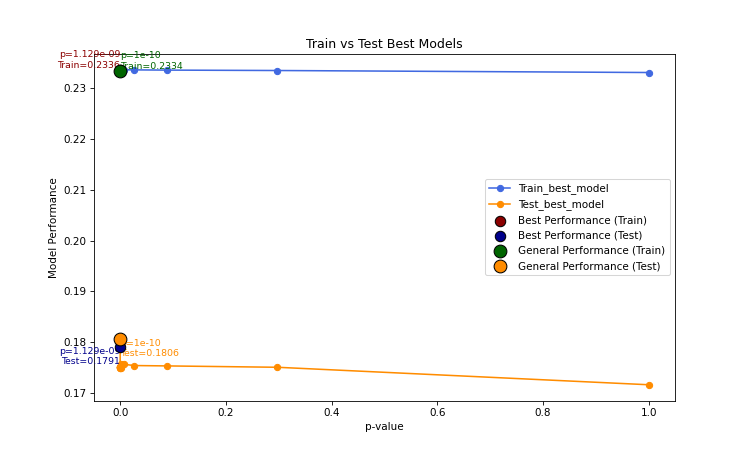

2. Reporting Generalized Performance:

|                             |             0 |
|:----------------------------|--------------:|
| clump_p1                    |   1           |
| clump_r2                    |   0.1         |
| clump_kb                    | 200           |
| p_window_size               | 200           |
| p_slide_size                |  50           |
| p_LD_threshold              |   0.25        |
| pvalue                      |   1e-10       |
| JAMPred_Iteration           |   0.01        |
| JAMPred_Beta_Lambda         |   0.1         |
| JAMPred_Beta_Binomial_Prior |   1           |
| JAMPred_Min_Effect          |   0.01        |
| JAMPred_Max_Effect          |   3           |
| JAMPred_Min_Var             |   0.01        |
| JAMPred_Max_Var             |   0.01        |
| numberofpca                 |   6           |
| tempalpha                   |   0.1         |
| l1weight                    |   0.1         |
| Train_pure_prs              |   4.4227e-06  |
|

<IPython.core.display.Javascript object>


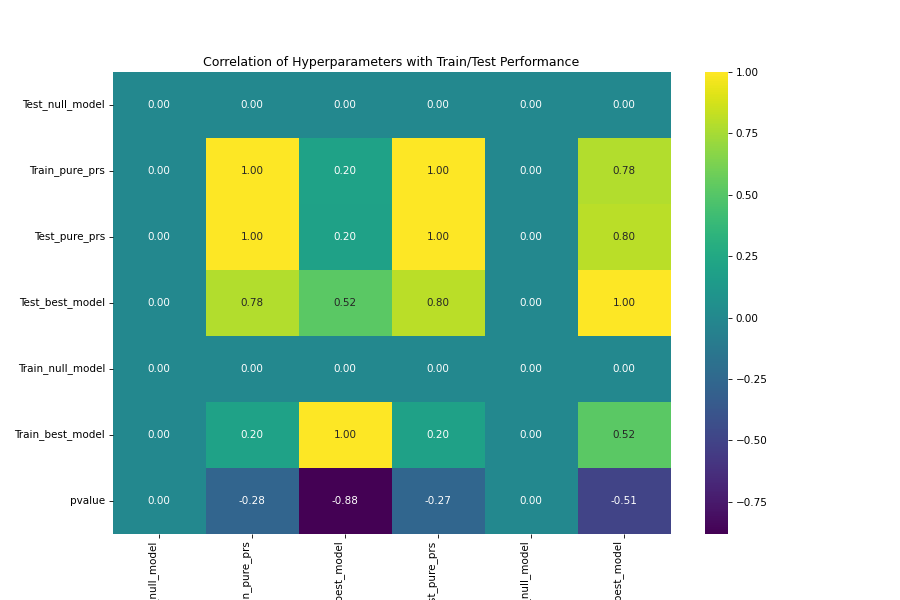

<IPython.core.display.Javascript object>


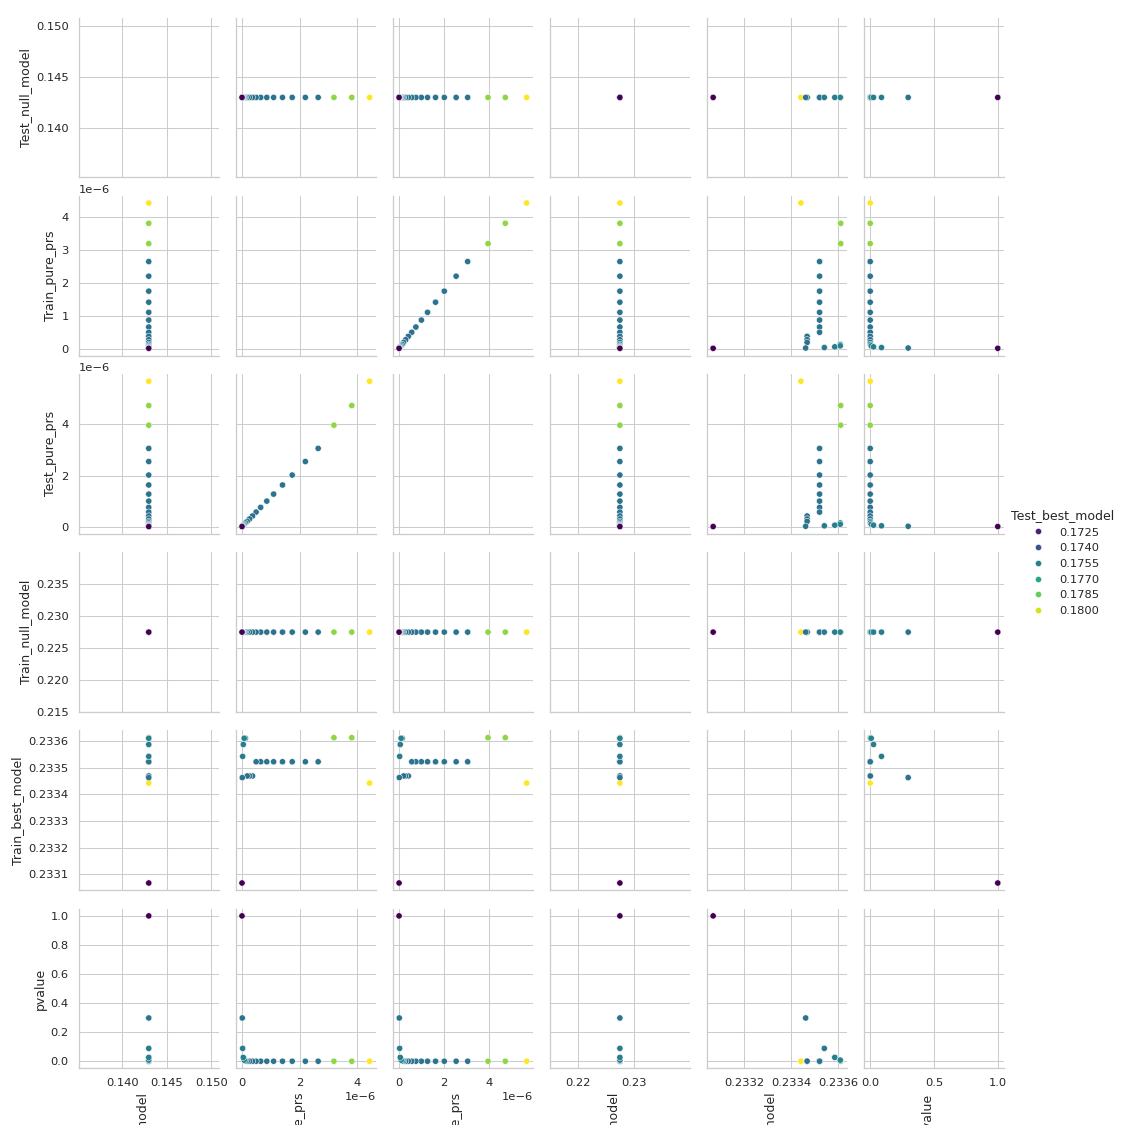

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

df = divided_result.sort_values(by='Train_best_model', ascending=False)
print("1. Reporting Based on Best Training Performance:\n")
print(df.iloc[0].to_markdown())


 
df = divided_result.copy()

# Plot Train and Test best models against p-values
plt.figure(figsize=(10, 6))
plt.plot(df['pvalue'], df['Train_best_model'], label='Train_best_model', marker='o', color='royalblue')
plt.plot(df['pvalue'], df['Test_best_model'], label='Test_best_model', marker='o', color='darkorange')

# Highlight the p-value where both train and test are high
best_index = df[['Train_best_model']].sum(axis=1).idxmax()
best_pvalue = df.loc[best_index, 'pvalue']
best_train = df.loc[best_index, 'Train_best_model']
best_test = df.loc[best_index, 'Test_best_model']

# Use dark colors for the circles
plt.scatter(best_pvalue, best_train, color='darkred', s=100, label=f'Best Performance (Train)', edgecolor='black', zorder=5)
plt.scatter(best_pvalue, best_test, color='darkblue', s=100, label=f'Best Performance (Test)', edgecolor='black', zorder=5)

# Annotate the best performance with p-value, train, and test values
plt.text(best_pvalue, best_train, f'p={best_pvalue:.4g}\nTrain={best_train:.4g}', ha='right', va='bottom', fontsize=9, color='darkred')
plt.text(best_pvalue, best_test, f'p={best_pvalue:.4g}\nTest={best_test:.4g}', ha='right', va='top', fontsize=9, color='darkblue')

# Calculate Difference and Sum
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']

# Sort the DataFrame
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
#sorted_df = df.sort_values(by=[ 'Difference','Sum'], ascending=[  True,False])

# Highlight the general performance
general_index = sorted_df.index[0]
general_pvalue = sorted_df.loc[general_index, 'pvalue']
general_train = sorted_df.loc[general_index, 'Train_best_model']
general_test = sorted_df.loc[general_index, 'Test_best_model']

plt.scatter(general_pvalue, general_train, color='darkgreen', s=150, label='General Performance (Train)', edgecolor='black', zorder=6)
plt.scatter(general_pvalue, general_test, color='darkorange', s=150, label='General Performance (Test)', edgecolor='black', zorder=6)

# Annotate the general performance with p-value, train, and test values
plt.text(general_pvalue, general_train, f'p={general_pvalue:.4g}\nTrain={general_train:.4g}', ha='left', va='bottom', fontsize=9, color='darkgreen')
plt.text(general_pvalue, general_test, f'p={general_pvalue:.4g}\nTest={general_test:.4g}', ha='left', va='top', fontsize=9, color='darkorange')

# Add labels and legend
plt.xlabel('p-value')
plt.ylabel('Model Performance')
plt.title('Train vs Test Best Models')
plt.legend()
plt.show()
 




print("2. Reporting Generalized Performance:\n")
df = divided_result.copy()
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
print(sorted_df.iloc[0].to_markdown())


print("3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':\n")

print("3. For string hyperparameters, we used one-hot encoding to find the correlation between string hyperparameters and 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model'.")

print("3. We performed this analysis for those hyperparameters that have more than one unique value.")

correlation_columns = [
 'Train_null_model', 'Train_pure_prs', 'Train_best_model',
 'Test_pure_prs', 'Test_null_model', 'Test_best_model'
]

hyperparams = [col for col in divided_result.columns if len(divided_result[col].unique()) > 1]
hyperparams = list(set(hyperparams+correlation_columns))
 
# Separate numeric and string columns
numeric_hyperparams = [col for col in hyperparams if pd.api.types.is_numeric_dtype(divided_result[col])]
string_hyperparams = [col for col in hyperparams if pd.api.types.is_string_dtype(divided_result[col])]


# Encode string columns using one-hot encoding
divided_result_encoded = pd.get_dummies(divided_result, columns=string_hyperparams)

# Combine numeric hyperparams with the new one-hot encoded columns
encoded_columns = [col for col in divided_result_encoded.columns if col.startswith(tuple(string_hyperparams))]
hyperparams = numeric_hyperparams + encoded_columns
 

# Calculate correlations
correlations = divided_result_encoded[hyperparams].corr()
 
# Display correlation of hyperparameters with train/test performance columns
hyperparam_correlations = correlations.loc[hyperparams, correlation_columns]
 
hyperparam_correlations = hyperparam_correlations.fillna(0)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(hyperparam_correlations, annot=True, cmap='viridis', fmt='.2f', cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Rotate y-axis labels to horizontal
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.title('Correlation of Hyperparameters with Train/Test Performance')
plt.show() 

sns.set_theme(style="whitegrid")  # Choose your preferred style
pairplot = sns.pairplot(divided_result_encoded[hyperparams],hue = 'Test_best_model', palette='viridis')

# Adjust the figure size
pairplot.fig.set_size_inches(15, 15)  # You can adjust the size as needed

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, ha='right')  # X-axis labels vertical
    #ax.set_ylabel(ax.get_ylabel(), rotation=0, va='bottom')  # Y-axis labels horizontal

# Show the plot
plt.show()


